In [9]:
import pandas as pd
purchase = pd.read_excel("/content/HackNiche 2.0 AI-ML PS 4 Dataset.xlsx", sheet_name = 'Purchase Dump')
sales = pd.read_excel("/content/HackNiche 2.0 AI-ML PS 4 Dataset.xlsx", sheet_name = 'Sales Dump')

In [170]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   686 non-null    datetime64[ns]
 1   Timestamp              686 non-null    datetime64[ns]
 2   Invoice No.            686 non-null    object        
 3   Payment Type           686 non-null    object        
 4   Order Type             686 non-null    object        
 5   Area                   506 non-null    object        
 6   Item Name              686 non-null    object        
 7   Price                  686 non-null    float64       
 8   Qty.                   686 non-null    int64         
 9   Sub Total              686 non-null    float64       
 10  Discount               686 non-null    float64       
 11  Tax                    686 non-null    float64       
 12  Final Total            686 non-null    float64       
 13  Statu

In [11]:
sales.isnull().sum()

Date              0
Timestamp         0
Invoice No.       0
Payment Type      0
Order Type        0
Area            180
Item Name         0
Price             0
Qty.              0
Sub Total         0
Discount          0
Tax               0
Final Total       0
Status            0
Table No.       232
Server Name       0
Covers            0
Variation       140
Category          0
Phone           398
Name            346
Address         581
Assign To       480
Non Taxable       0
CGST Rate         0
CGST Amount       0
SGST Rate         0
SGST Amount       0
VAT Rate          0
VAT Amount        0
dtype: int64

In [6]:
sales.head()

Date           Timestamp Invoice No. Payment Type Order Type    Area  \
0 2024-01-22 2024-01-22 23:57:19       21006         CARD    Dine In  Dining   
1 2024-01-22 2024-01-22 23:57:19       21006         CARD    Dine In  Dining   
2 2024-01-22 2024-01-22 23:57:19       21006         CARD    Dine In  Dining   
3 2024-01-22 2024-01-22 23:57:19       21006         CARD    Dine In  Dining   
4 2024-01-22 2024-01-22 23:43:28       21005         CARD    Dine In  Dining   

                              Item Name   Price  Qty.  Sub Total  ...  \
0                             Aeropress  247.62     1     247.62  ...   
1               Iced Americano (350 ML)  176.19     1     176.19  ...   
2  Add On Syrup (Add On Tiramisu Syrup)   47.62     1      47.62  ...   
3                        Baked Vada Pav   76.19     2     152.38  ...   
4    South Indian Filter Kaapi (250 ML)  176.19     2     352.38  ...   

       Assign To  Non Taxable  CGST Rate CGST Amount SGST Rate SGST Amount  \
0            NaN          0.0        2.5        6.19       2.5        6.19   
1            NaN          0.0        2.5        4.40       2.5        4.40   
2            NaN          0.0        2.5        1.19       2.5        1.19   
3            NaN          0.0        2.5        3.81       2.5        3.81   
4  NARESH RATHOD          0.0        2.5        8.81       2.5        8.81   

   VAT Rate VAT Amount Service Charge Rate  Service Charge Amount  
0        10      24.76                 NaN                    NaN  
1        10      17.62                 NaN                    NaN  
2        10       4.76                 NaN                    NaN  
3        10      15.24                 NaN                    NaN  
4        10      35.24                 NaN                    NaN  

[5 rows x 34 columns]

The data consists of only 3 days

In [30]:
sales['Date'].nunique()

array(['2024-01-22T00:00:00.000000000', '2024-01-21T00:00:00.000000000',
       '2024-01-20T00:00:00.000000000'], dtype='datetime64[ns]')

There are a total of 686 orders placed in 3 days

In [7]:
len(sales)

686

Removed columns that had all values as NULL

In [10]:
sales.drop(columns=['Service Charge Rate', 'Service Charge Amount', 'GST', 'HSN'], axis=1, inplace=True)

In [63]:
sales.drop(columns=['Covers'], axis=1, inplace=True)

In [12]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'Phone', 'Name', 'Address', 'Assign To',
       'Non Taxable', 'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount',
       'VAT Rate', 'VAT Amount'],
      dtype='object')

Grouping Items by their total sales, and ranking top 15

---



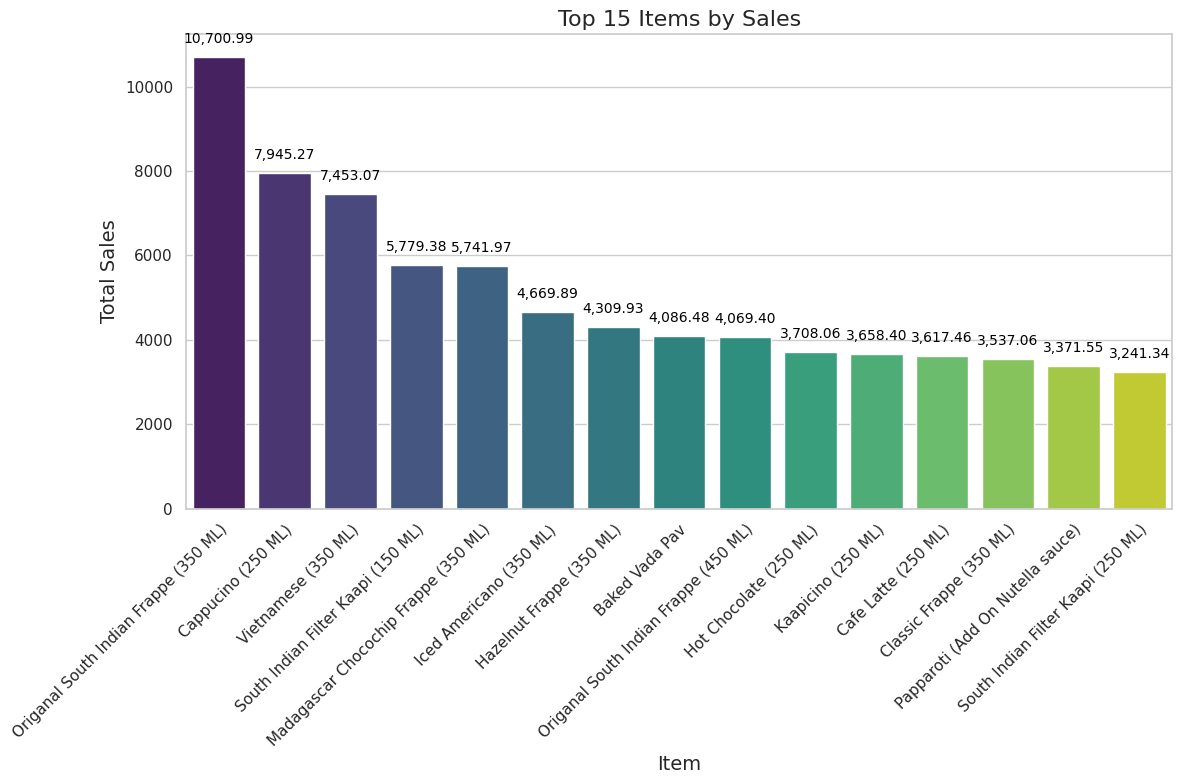

In [171]:
item_sales = sales.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False)
top_items = item_sales.head(15)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", len(top_items))

ax = sns.barplot(x=top_items.index, y=top_items.values, palette=colors)

plt.title('Top 15 Items by Sales', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

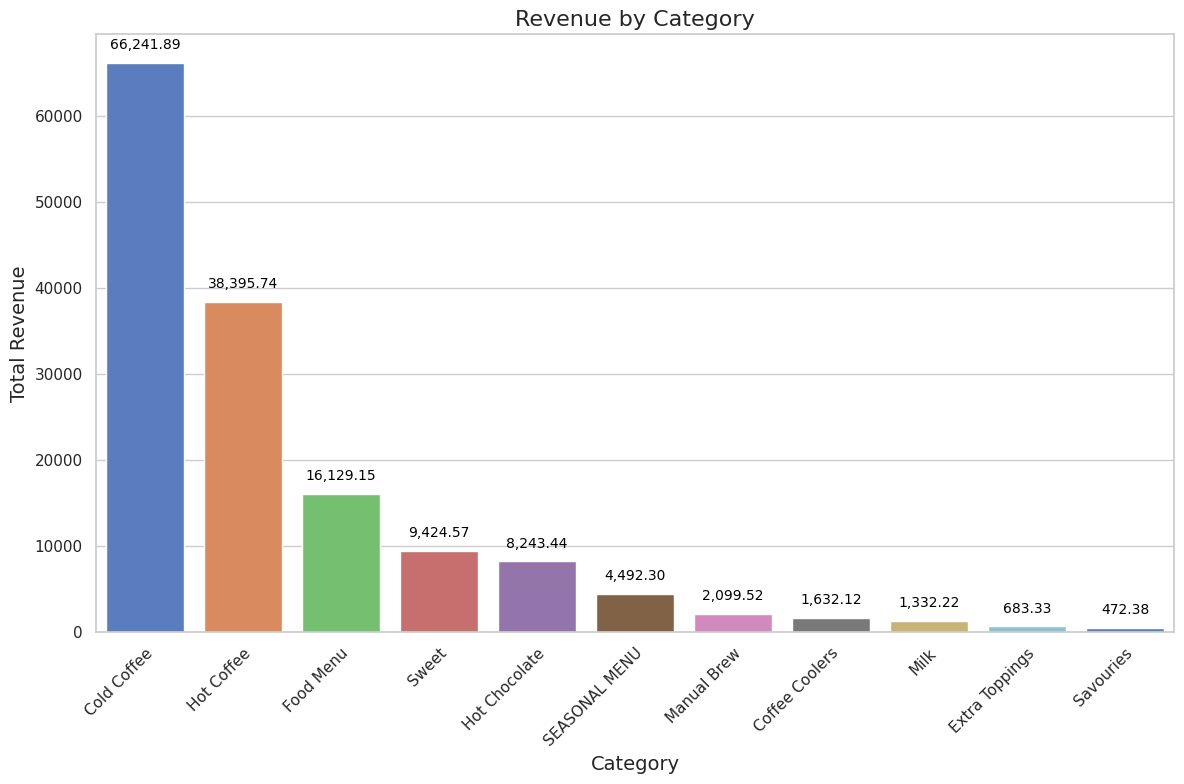

In [172]:
category_revenue = sales.groupby('Category')['Final Total'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

colors = sns.color_palette("muted", len(category_revenue))

ax = sns.barplot(x=category_revenue.index, y=category_revenue.values, palette=colors)

plt.title('Revenue by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [22]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Date']

0     2024-01-22
1     2024-01-22
2     2024-01-22
3     2024-01-22
4     2024-01-22
         ...    
681   2024-01-20
682   2024-01-20
683   2024-01-20
684   2024-01-20
685   2024-01-20
Name: Date, Length: 686, dtype: datetime64[ns]

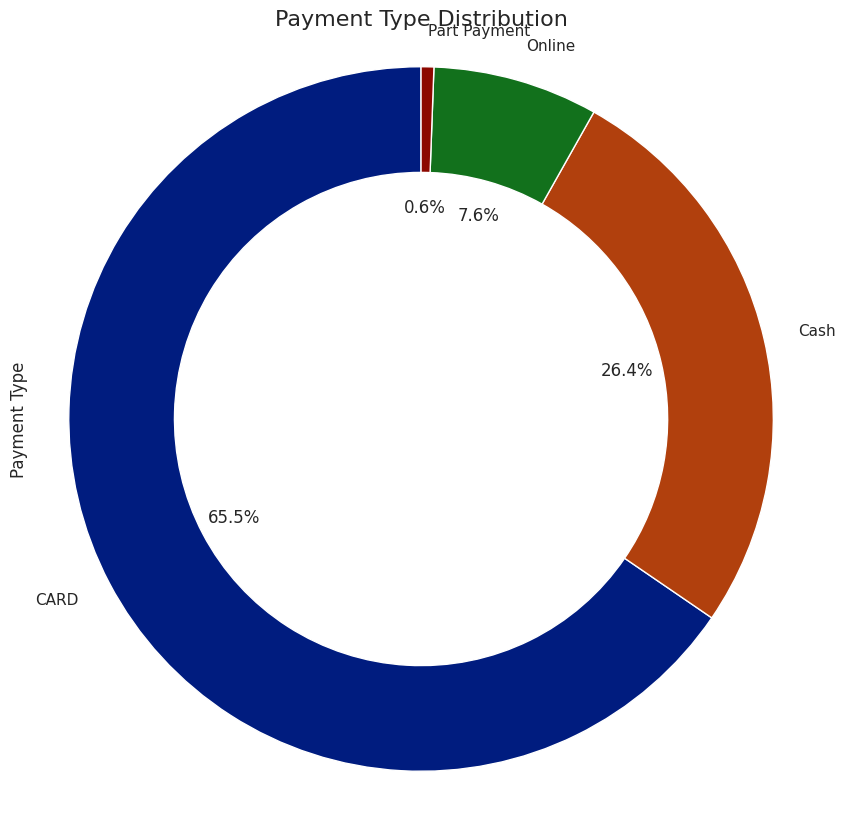

In [176]:
payment_distribution = sales['Payment Type'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

colors = sns.color_palette("dark")

ax = payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

plt.title('Payment Type Distribution', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

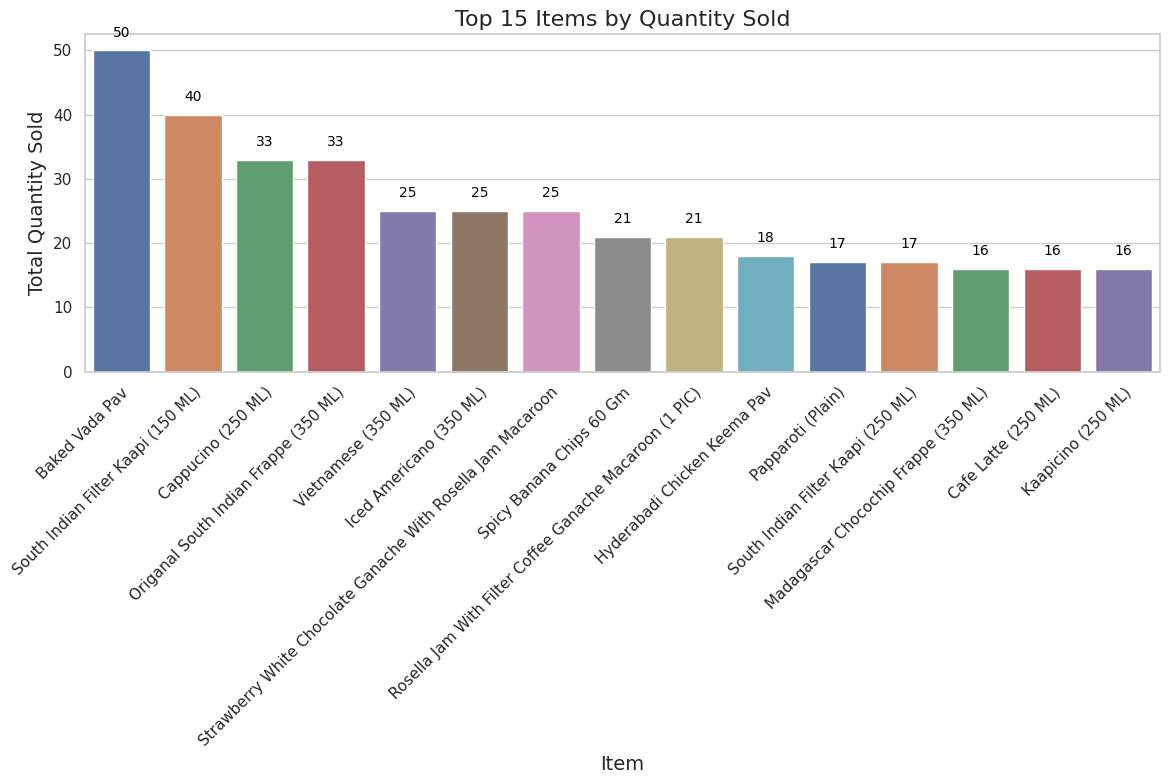

In [178]:
item_quantity = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("deep")
top_items_quantity = item_quantity.head(15)

ax = sns.barplot(x=top_items_quantity.index, y=top_items_quantity.values, palette=colors)

plt.title('Top 15 Items by Quantity Sold', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

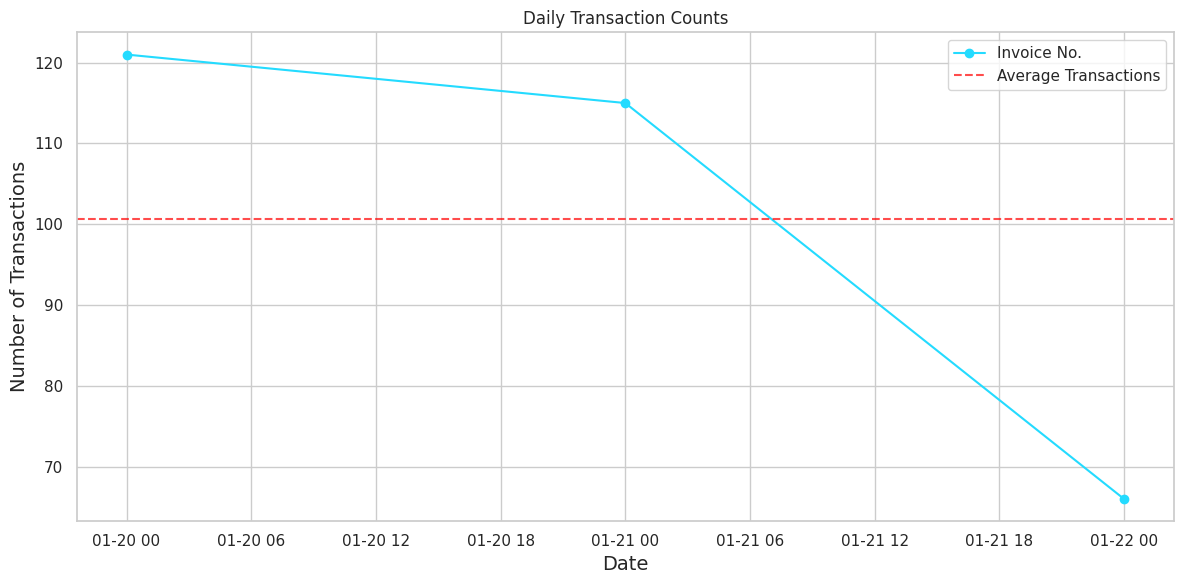

Intervals with Reduced Activity:
Date
2024-01-22    66
Name: Invoice No., dtype: int64


In [180]:
sales['Date'] = pd.to_datetime(sales['Date'])

daily_transactions = sales.groupby(sales['Date'].dt.date)['Invoice No.'].nunique()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

colors = sns.color_palette("cool")

ax = daily_transactions.plot(kind='line', marker='o', color=colors[0], title='Daily Transaction Counts')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
average_daily_transactions = daily_transactions.mean()

plt.axhline(y=average_daily_transactions, color='red', linestyle='--', label='Average Transactions', alpha=0.7)

plt.legend()

plt.tight_layout()
plt.show()

threshold = 0.8 * average_daily_transactions
reduced_activity_intervals = daily_transactions[daily_transactions < threshold]

print("Intervals with Reduced Activity:")
print(reduced_activity_intervals)


In [31]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'Phone', 'Name', 'Address', 'Assign To',
       'Non Taxable', 'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount',
       'VAT Rate', 'VAT Amount'],
      dtype='object')

In [95]:
sales['Qty.']

0      1
1      1
2      1
3      2
4      2
      ..
681    1
682    1
683    1
684    1
685    1
Name: Qty., Length: 686, dtype: int64

# Insights from Payment type

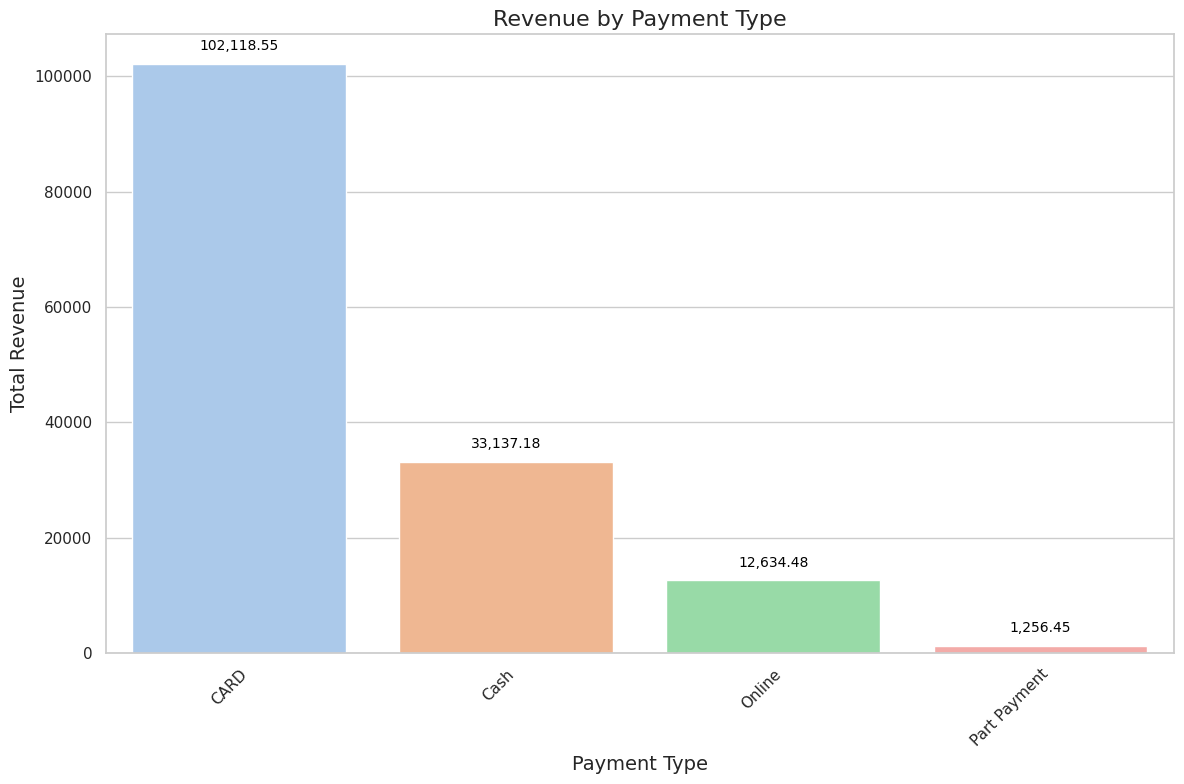

In [181]:

revenue_by_payment = sales.groupby('Payment Type')['Final Total'].sum().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("pastel")

ax = sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values, palette=colors)

plt.title('Revenue by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

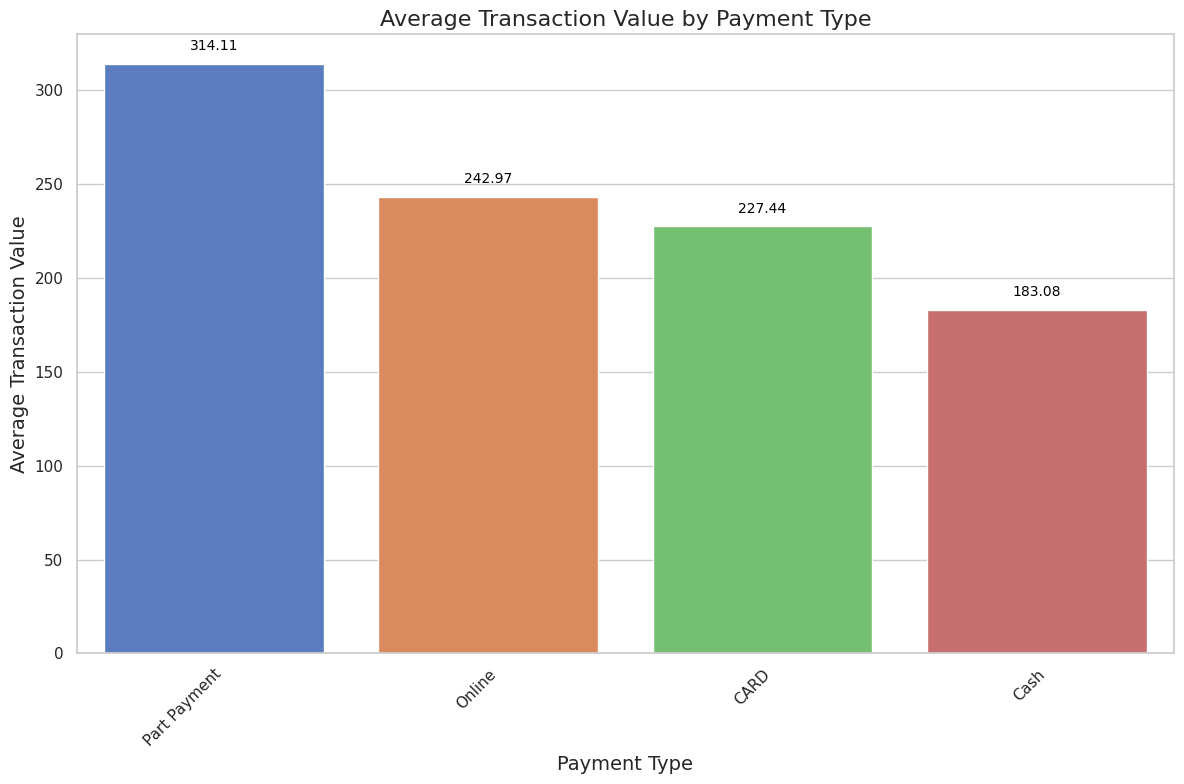

In [182]:


avg_transaction_value = sales.groupby('Payment Type')['Final Total'].mean().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("muted")

ax = sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette=colors)

plt.title('Average Transaction Value by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


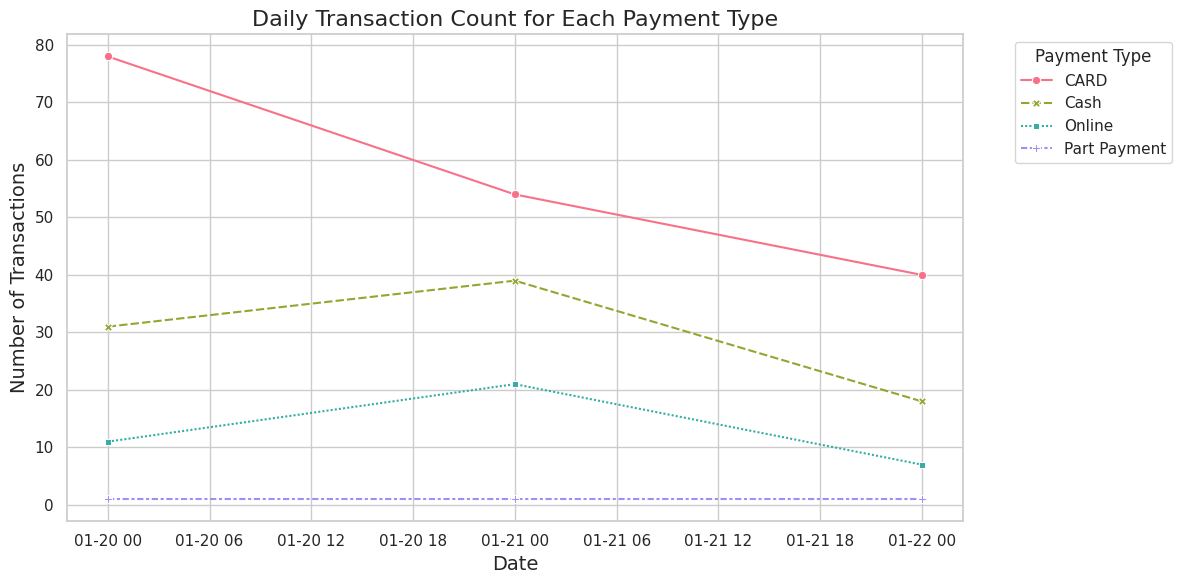

In [183]:

sales['Date'] = pd.to_datetime(sales['Date'])

daily_transactions_by_payment = sales.groupby(['Date', 'Payment Type'])['Invoice No.'].nunique().unstack()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

colors = sns.color_palette("husl", n_colors=len(daily_transactions_by_payment.columns))

ax = sns.lineplot(data=daily_transactions_by_payment, markers=True, palette=colors)

plt.title('Daily Transaction Count for Each Payment Type', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

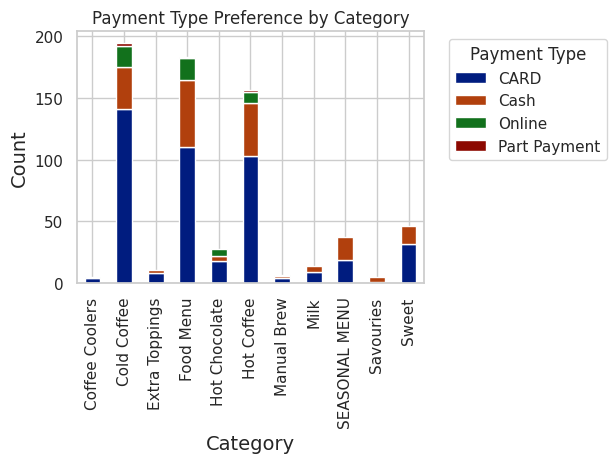

In [186]:

plt.figure(figsize=(12, 8))

colors = sns.color_palette("dark", n_colors=len(payment_preference_by_category.columns))

ax = payment_preference_by_category.plot(kind='bar', stacked=True, color=colors, title='Payment Type Preference by Category')

plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [37]:
sales['Payment Type'].unique()

array(['CARD', 'Cash', 'Online', 'Part Payment'], dtype=object)

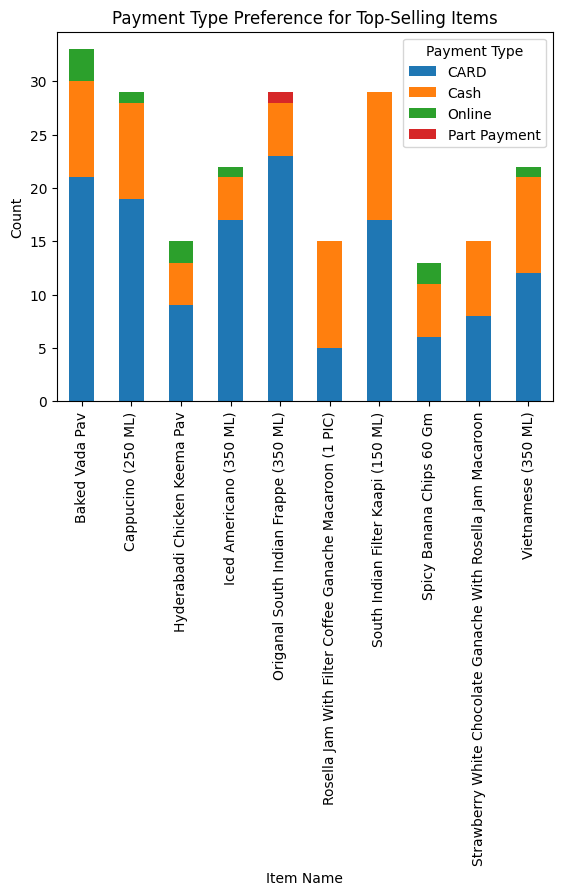

In [39]:
top_selling_items = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False).head(10)

payment_preference_for_top_items = pd.crosstab(sales[sales['Item Name'].isin(top_selling_items.index)]['Item Name'],
                                               sales['Payment Type'], margins=True, margins_name='Total')

payment_preference_for_top_items = payment_preference_for_top_items.drop('Total', axis=1).drop('Total', axis=0)

payment_preference_for_top_items.plot(kind='bar', stacked=True, title='Payment Type Preference for Top-Selling Items')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.show()


In [64]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

In [44]:
sales['Order Type'].unique()

array(['Dine In', 'Pick Up', 'Delivery(Parcel)'], dtype=object)

In [59]:
sales['Status'].value_counts()

Success          611
Complimentary     74
Cancelled          1
Name: Status, dtype: int64

In [67]:
sales['Variation']

0                        NaN
1                     350 ML
2      Add On Tiramisu Syrup
3                        NaN
4                     250 ML
               ...          
681     Add On Nutella sauce
682                      NaN
683                   250 ML
684                      NaN
685                   350 ML
Name: Variation, Length: 686, dtype: object

# Insights from Oder Type

In [70]:
sales['Category'].unique()

array(['Manual Brew', 'Cold Coffee', 'Extra Toppings', 'Food Menu',
       'Hot Coffee', 'Hot Chocolate', 'Milk', 'Savouries', 'Sweet',
       'SEASONAL MENU', 'Coffee Coolers'], dtype=object)

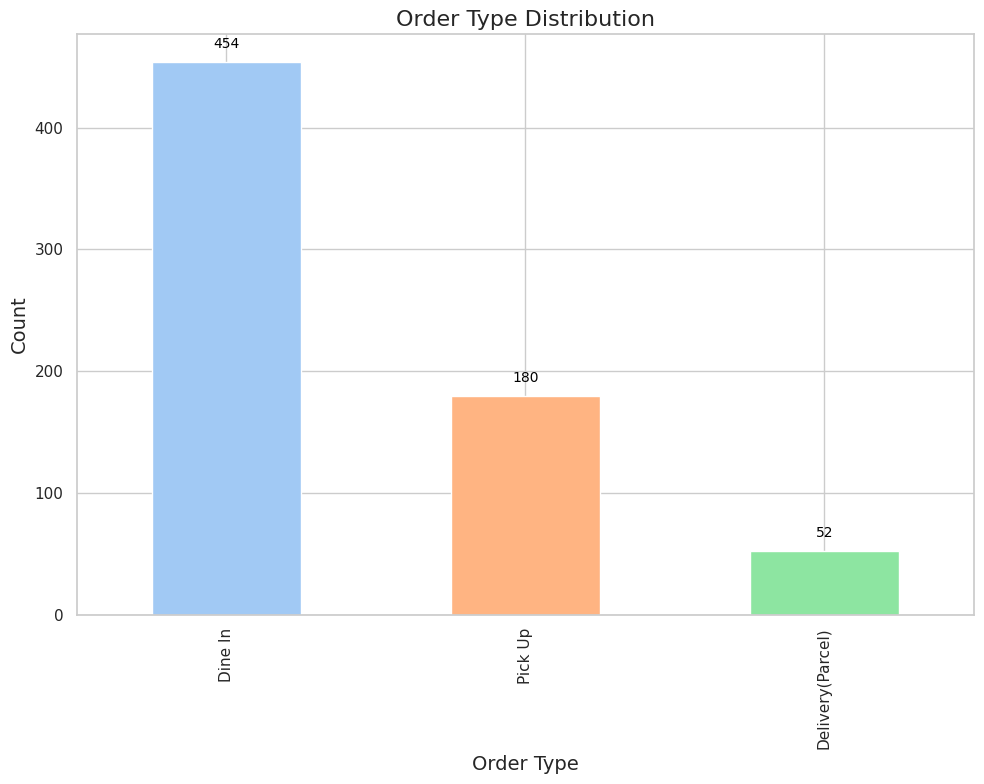

In [190]:
plt.figure(figsize=(10, 8))
order_type_distribution = sales['Order Type'].value_counts()

colors = sns.color_palette("pastel")

ax = order_type_distribution.plot(kind='bar', color=colors)

plt.title('Order Type Distribution', fontsize=16)
plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

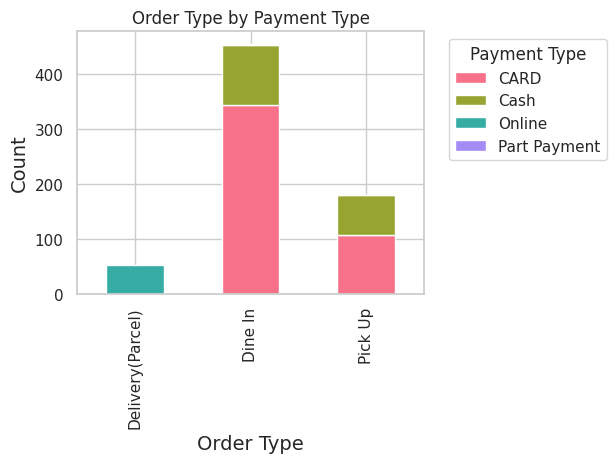

In [189]:
order_type_payment_analysis = pd.crosstab(sales['Order Type'], sales['Payment Type'], margins=True, margins_name='Total')

order_type_payment_analysis = order_type_payment_analysis.drop('Total', axis=1).drop('Total', axis=0)

plt.figure(figsize=(12, 8))

colors_payment = sns.color_palette("husl", n_colors=len(order_type_payment_analysis.columns))

ax_payment = order_type_payment_analysis.plot(kind='bar', stacked=True, color=colors_payment, title='Order Type by Payment Type')

plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


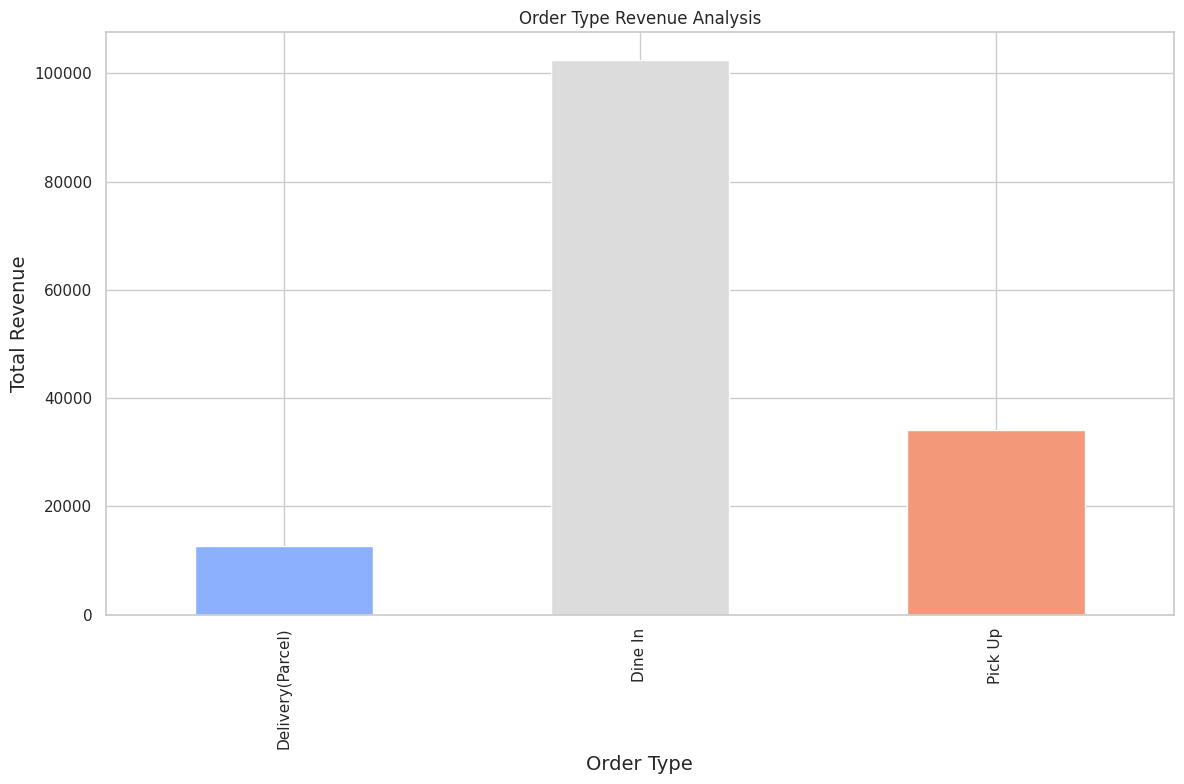

In [191]:
order_type_revenue_analysis = sales.groupby('Order Type')['Final Total'].sum()

plt.figure(figsize=(12, 8))

colors_revenue = sns.color_palette("coolwarm", n_colors=len(order_type_revenue_analysis))

ax_revenue = order_type_revenue_analysis.plot(kind='bar', color=colors_revenue, title='Order Type Revenue Analysis')

plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.tight_layout()
plt.show()

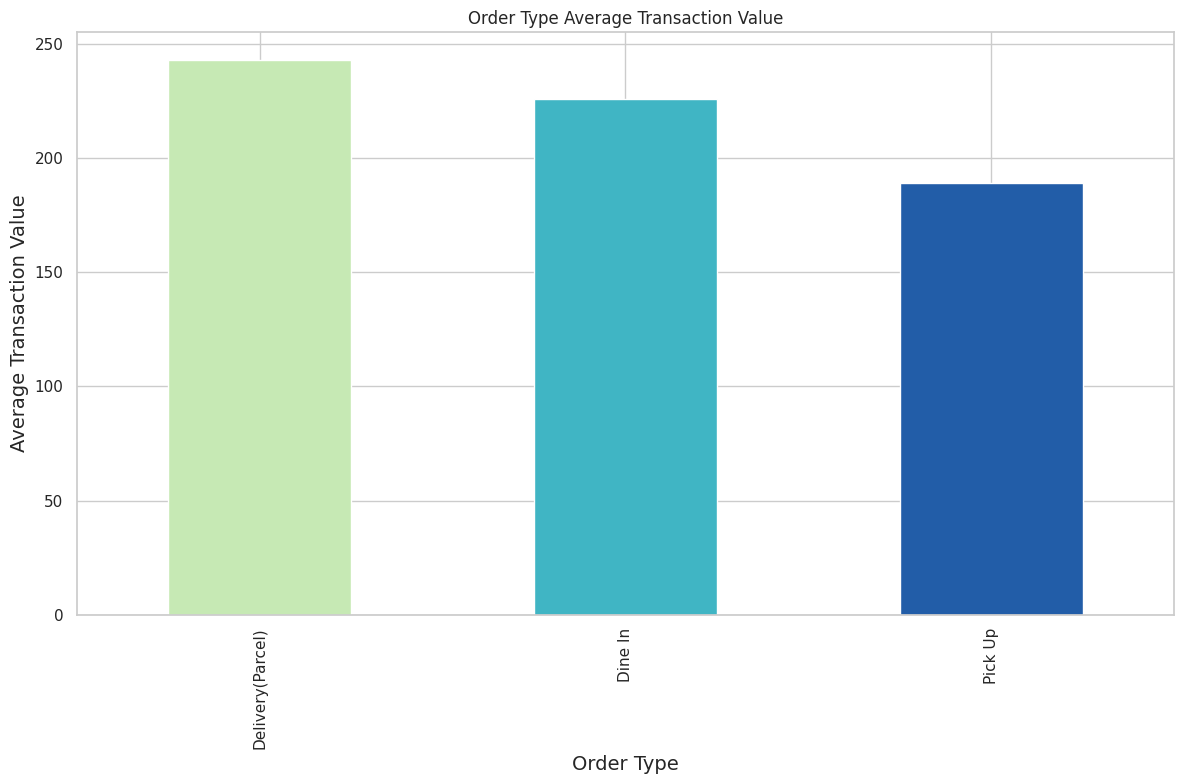

In [192]:
order_type_avg_transaction = sales.groupby('Order Type')['Final Total'].mean()

plt.figure(figsize=(12, 8))

colors_avg_transaction = sns.color_palette("YlGnBu", n_colors=len(order_type_avg_transaction))

ax_avg_transaction = order_type_avg_transaction.plot(kind='bar', color=colors_avg_transaction, title='Order Type Average Transaction Value')

plt.xlabel('Order Type', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.tight_layout()
plt.show()

In [75]:
sales['Order Type'].value_counts()

Dine In             454
Pick Up             180
Delivery(Parcel)     52
Name: Order Type, dtype: int64

In [77]:
sales['Area'].value_counts()

Dining                 445
Swiggy                  31
Zomato                  21
Private Dining Area      9
Name: Area, dtype: int64

In [55]:
sales['Area'].unique()

array(['Dining', nan, 'Swiggy', 'Zomato', 'Private Dining Area'],
      dtype=object)

In [71]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

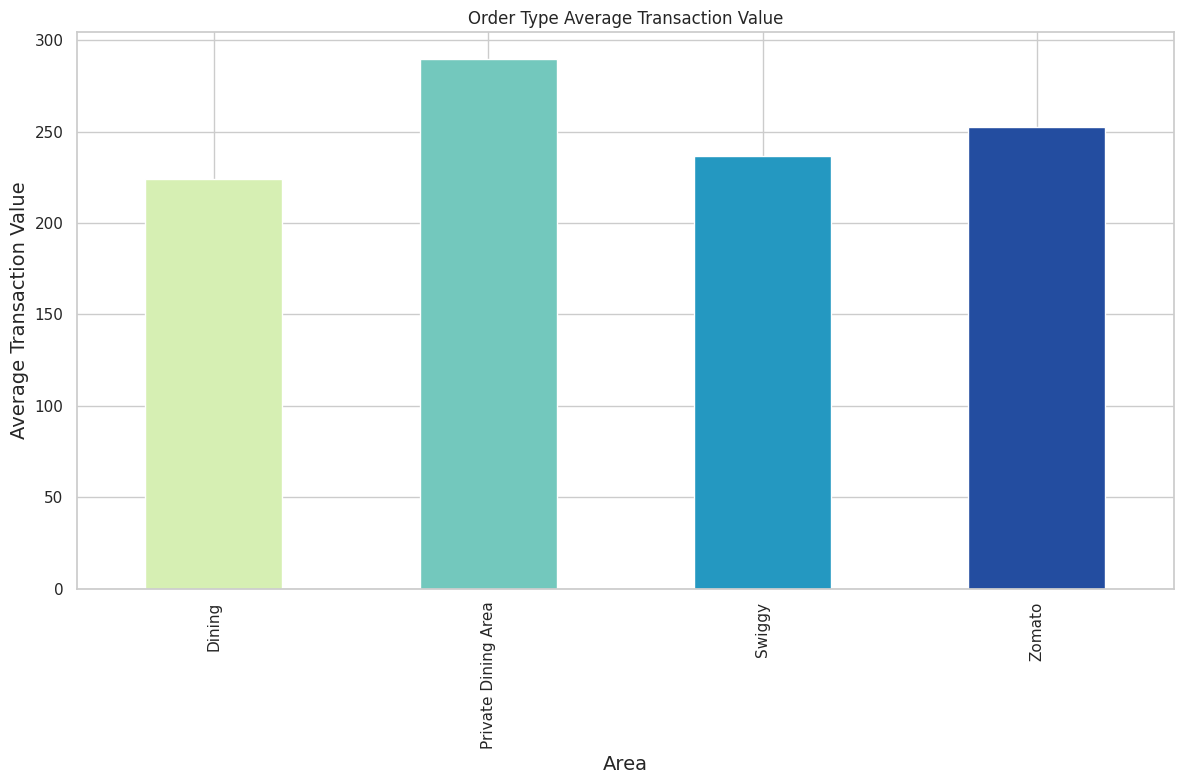

In [193]:
order_type_avg_transaction = sales.groupby('Area')['Final Total'].mean()

plt.figure(figsize=(12, 8))

colors_avg_transaction_area = sns.color_palette("YlGnBu", n_colors=len(order_type_avg_transaction))

ax_avg_transaction_area = order_type_avg_transaction.plot(kind='bar', color=colors_avg_transaction_area, title='Order Type Average Transaction Value')

plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Transaction Value', fontsize=14)

plt.tight_layout()
plt.show()


In [82]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount'],
      dtype='object')

In [ ]:
a = set(sales['Item Name'].unique())
a

# price

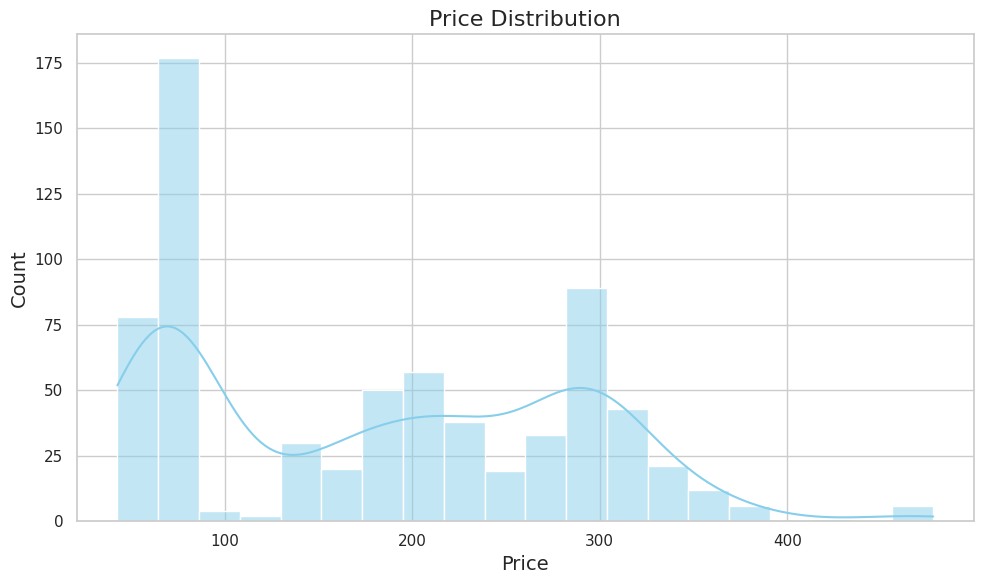

In [194]:
plt.figure(figsize=(10, 6))

sns.histplot(sales['Price'], bins=20, kde=True, color='skyblue')

plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


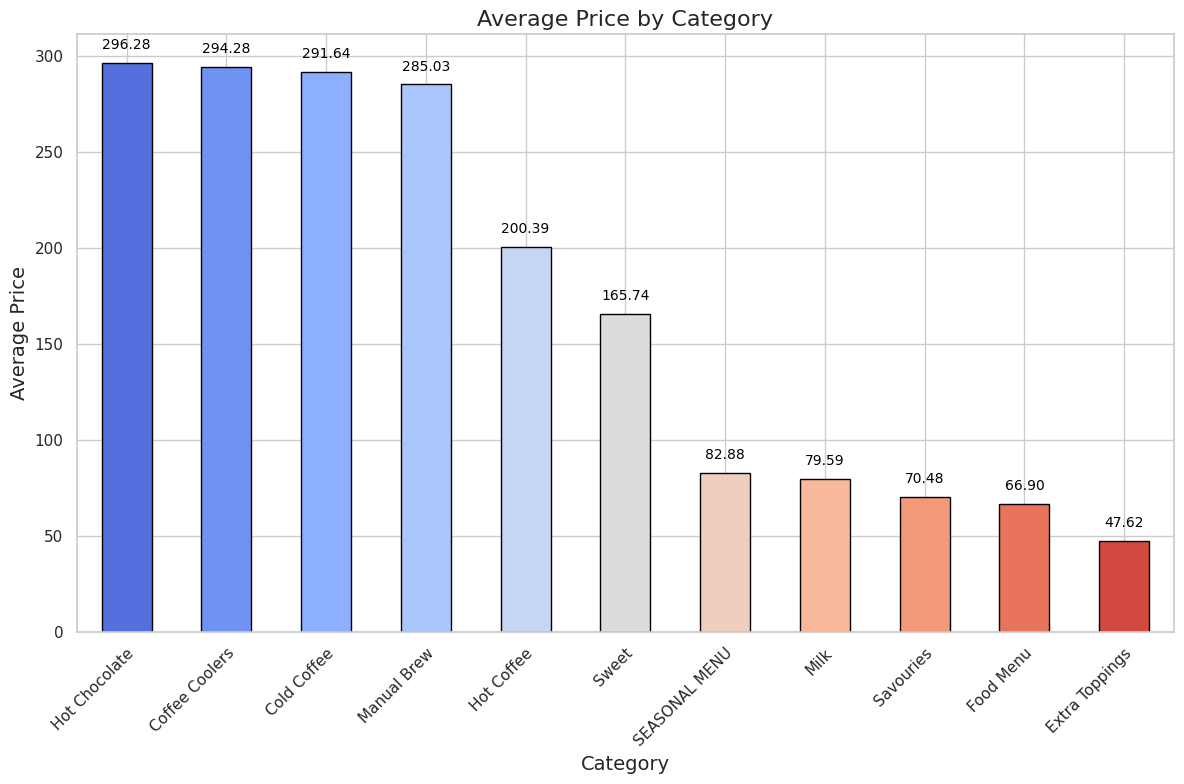

In [196]:
plt.figure(figsize=(12, 8))

colors_avg_price_category = sns.color_palette("coolwarm", n_colors=len(average_price_by_category))

ax_avg_price_category = average_price_by_category.plot(kind='bar', color=colors_avg_price_category, edgecolor='black', linewidth=1)

plt.title('Average Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

for p in ax_avg_price_category.patches:
    ax_avg_price_category.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                   ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 10),
                                   textcoords='offset points')

plt.tight_layout()
plt.show()


In [101]:
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Final Total', 'Category']

new_df = sales[selected_columns]


In [103]:
sales['Order Type'].value_counts()

Dine In             454
Pick Up             180
Delivery(Parcel)     52
Name: Order Type, dtype: int64

In [104]:
# Assuming 'Phone' is a unique identifier for customers
customer_segments = sales.groupby('Phone').agg({
    'Final Total': 'sum',
    'Qty.': 'sum',
    'Category': lambda x: x.mode().iat[0],
}).reset_index()


In [108]:
customer_segments

Phone  Final Total  Qty.        Category
0   1.111111e+09       861.89     7       Food Menu
1   1.111111e+09      1238.08    14   SEASONAL MENU
2   7.007484e+09       295.71     1   Hot Chocolate
3   7.014458e+09       460.02     3       Food Menu
4   7.017247e+09      1193.84     6     Cold Coffee
..           ...          ...   ...             ...
64  9.930675e+09       569.53     2     Cold Coffee
65  9.957998e+09       700.97     2     Cold Coffee
66  9.967349e+09      2371.18     9      Hot Coffee
67  9.967936e+09       233.33     1           Sweet
68  9.971148e+09       664.99     2  Coffee Coolers

[69 rows x 4 columns]

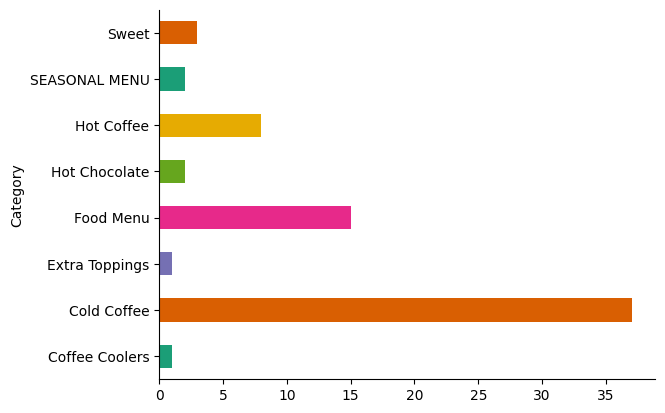

In [110]:

from matplotlib import pyplot as plt
import seaborn as sns
customer_segments.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

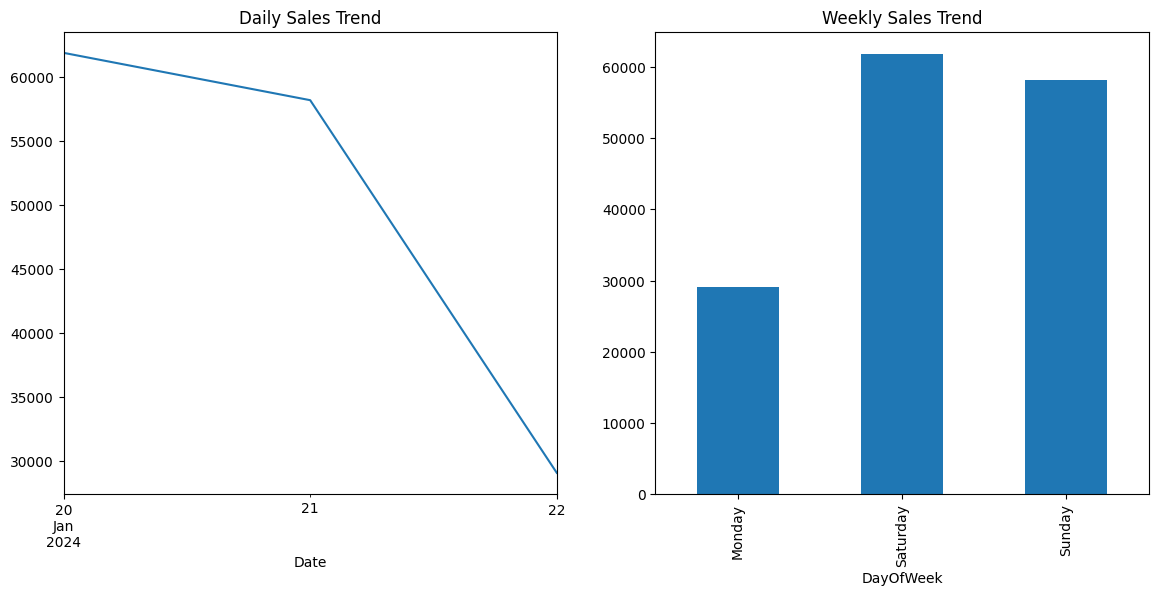

In [105]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['DayOfWeek'] = sales['Date'].dt.day_name()

daily_sales = sales.groupby('Date')['Final Total'].sum()
weekly_sales = sales.groupby('DayOfWeek')['Final Total'].sum()

# Visualize trends
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
daily_sales.plot(title='Daily Sales Trend')
plt.subplot(1, 2, 2)
weekly_sales.plot(kind='bar', title='Weekly Sales Trend')
plt.show()


In [111]:
# Example: Calculate repeat purchase rate for each segment
repeat_purchase_rate = sales.groupby('Phone')['Date'].nunique().value_counts(normalize=True)


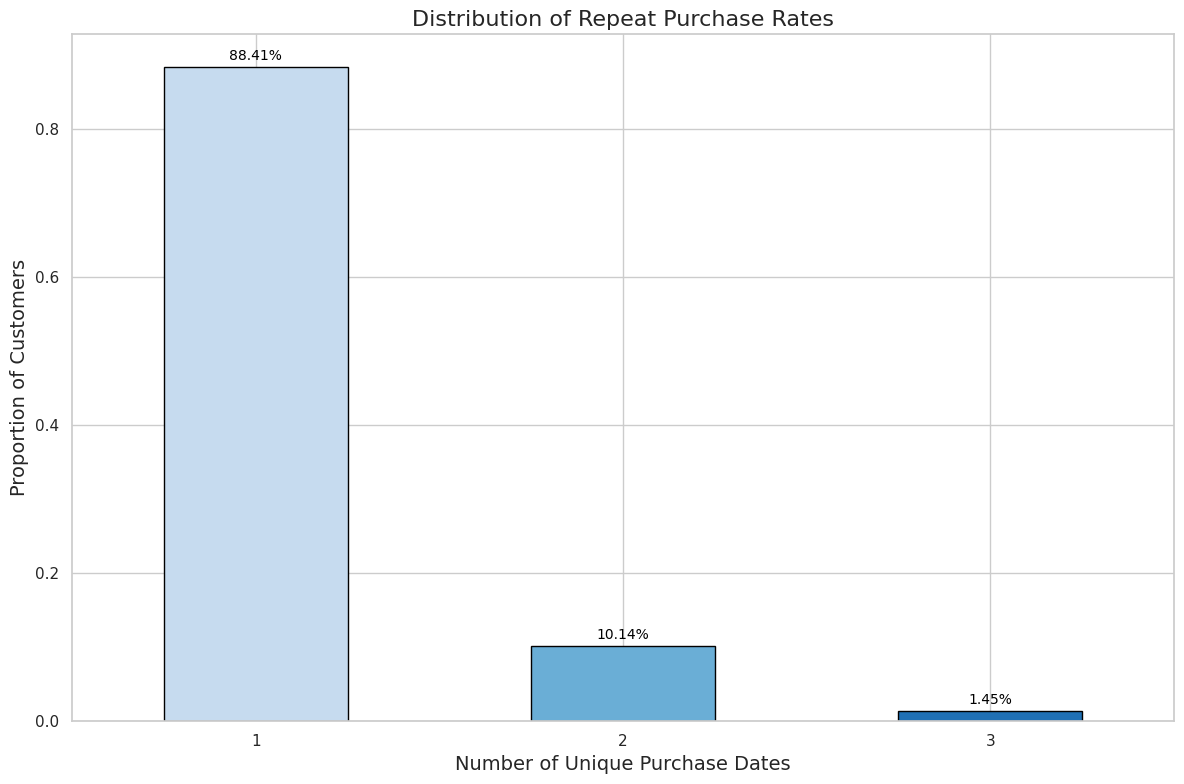

In [197]:
plt.figure(figsize=(12, 8))

colors_repeat_purchase = sns.color_palette("Blues", n_colors=len(repeat_purchase_rate))

ax_repeat_purchase = repeat_purchase_rate.sort_index().plot(kind='bar', color=colors_repeat_purchase, edgecolor='black', linewidth=1)

plt.title('Distribution of Repeat Purchase Rates', fontsize=16)
plt.xlabel('Number of Unique Purchase Dates', fontsize=14)
plt.ylabel('Proportion of Customers', fontsize=14)

plt.xticks(rotation=0, ha='center')

for p in ax_repeat_purchase.patches:
    ax_repeat_purchase.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

plt.tight_layout()
plt.show()

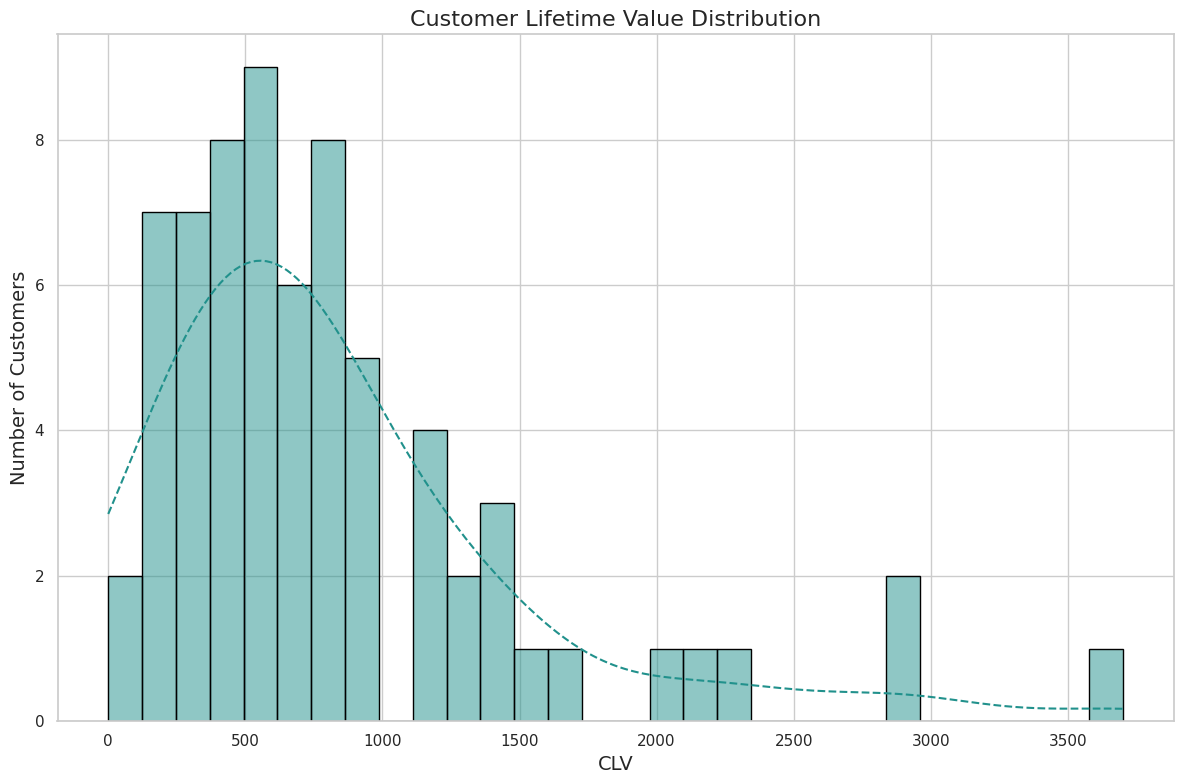

In [198]:

plt.figure(figsize=(12, 8))

colors_clv = sns.color_palette("viridis", n_colors=1)

ax_clv = sns.histplot(clv_data['CLV'], bins=30, color=colors_clv[0], kde=True, edgecolor='black', linewidth=1)

plt.title('Customer Lifetime Value Distribution', fontsize=16)
plt.xlabel('CLV', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

for line in ax_clv.lines:
    line.set_linestyle('--')

plt.tight_layout()
plt.show()


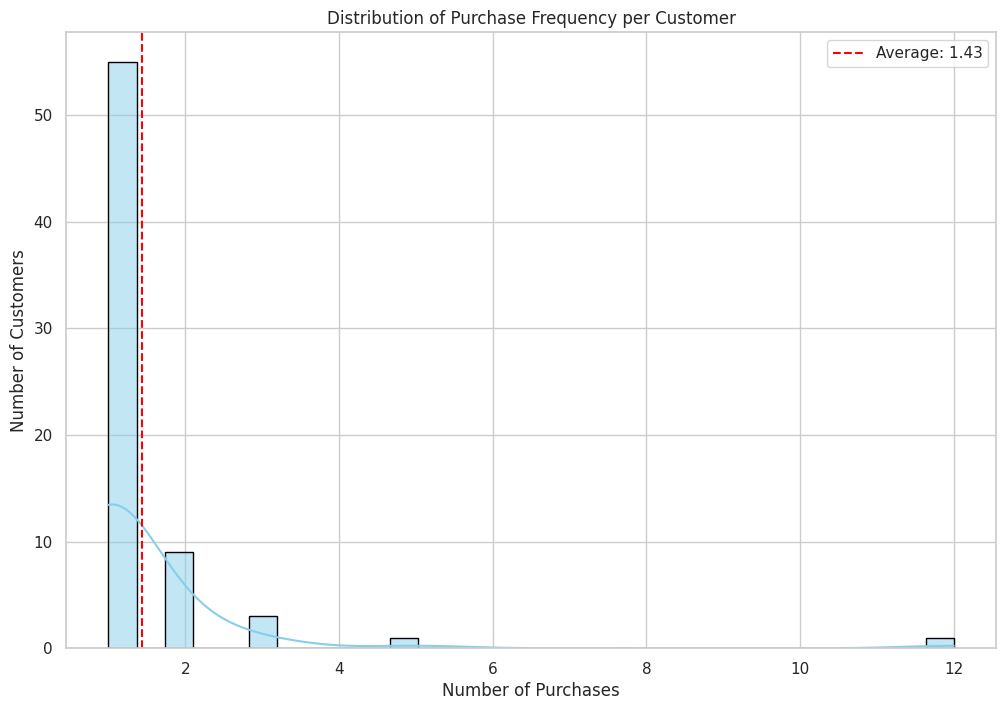

In [201]:
purchase_frequency = sales.groupby('Phone')['Invoice No.'].nunique()

average_purchase_frequency = purchase_frequency.mean()

plt.figure(figsize=(12, 8))
sns.histplot(purchase_frequency, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1)

plt.axvline(x=average_purchase_frequency, color='red', linestyle='--', label=f'Average: {average_purchase_frequency:.2f}')

plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.legend()

plt.show()

In [202]:
repeat_purchase_rate = sales.groupby('Phone')['Date'].nunique().value_counts(normalize=True)
repeat_purchase_rate*100

1    88.405797
2    10.144928
3     1.449275
Name: Date, dtype: float64

In [ ]:
price_elasticity = sales.groupby('Price')['Qty.'].mean()
price_elasticity

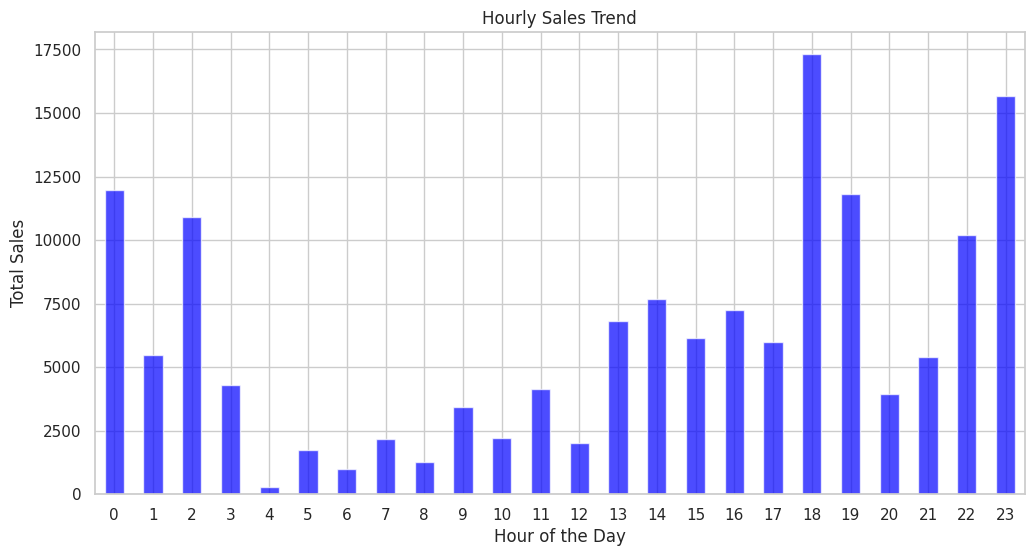

In [205]:
import matplotlib.pyplot as plt

sales['Timestamp'] = pd.to_datetime(sales['Timestamp'])

sales['HourOfDay'] = sales['Timestamp'].dt.hour

hourly_sales = sales.groupby('HourOfDay')['Final Total'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


In [ ]:
%pip install h2o

In [137]:
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Category', 'Final Total']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(sales[selected_columns])

# Specify categorical columns for label encoding
categorical_columns = ['Payment Type', 'Order Type', 'Area', 'Category']

# Convert categorical columns to factors (label encoding)
for col in categorical_columns:
    h2o_df[col] = h2o_df[col].asfactor()

# Specify predictor and response columns
predictors = categorical_columns + ['Qty.']
response = 'Final Total'

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=predictors, y=response, training_frame=h2o_df)

# View the leaderboard
lb = aml.leaderboard
print(lb)


Checking whether there is an H2O instance running at http://localhost:54321.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         4 mins 34 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_39ernz
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240217_74835     65.7598  4324.35  40.3326    0.515412                   4324.35
GBM_4_AutoML_1_20240217_74835                           65.775   4326.35  40.8627    0.515214                   4326.35
GBM_2_AutoML_1_20240217_74835                           65.967   4351.65  41.4844    0.515615                   4351.65
StackedEnsemble_BestOfFamily_1_AutoML_1_20240217_74835  65.9734  4352.49  40.3811    0.515234                   4352.49
GBM_3_AutoML_1_20240217_74835                           66.3972  4408.59  41.0815    0.516991                   4408.59
XGBoost_3_AutoML_1_20240217_74835                       69.407   4817.33  42.7912    0.523

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

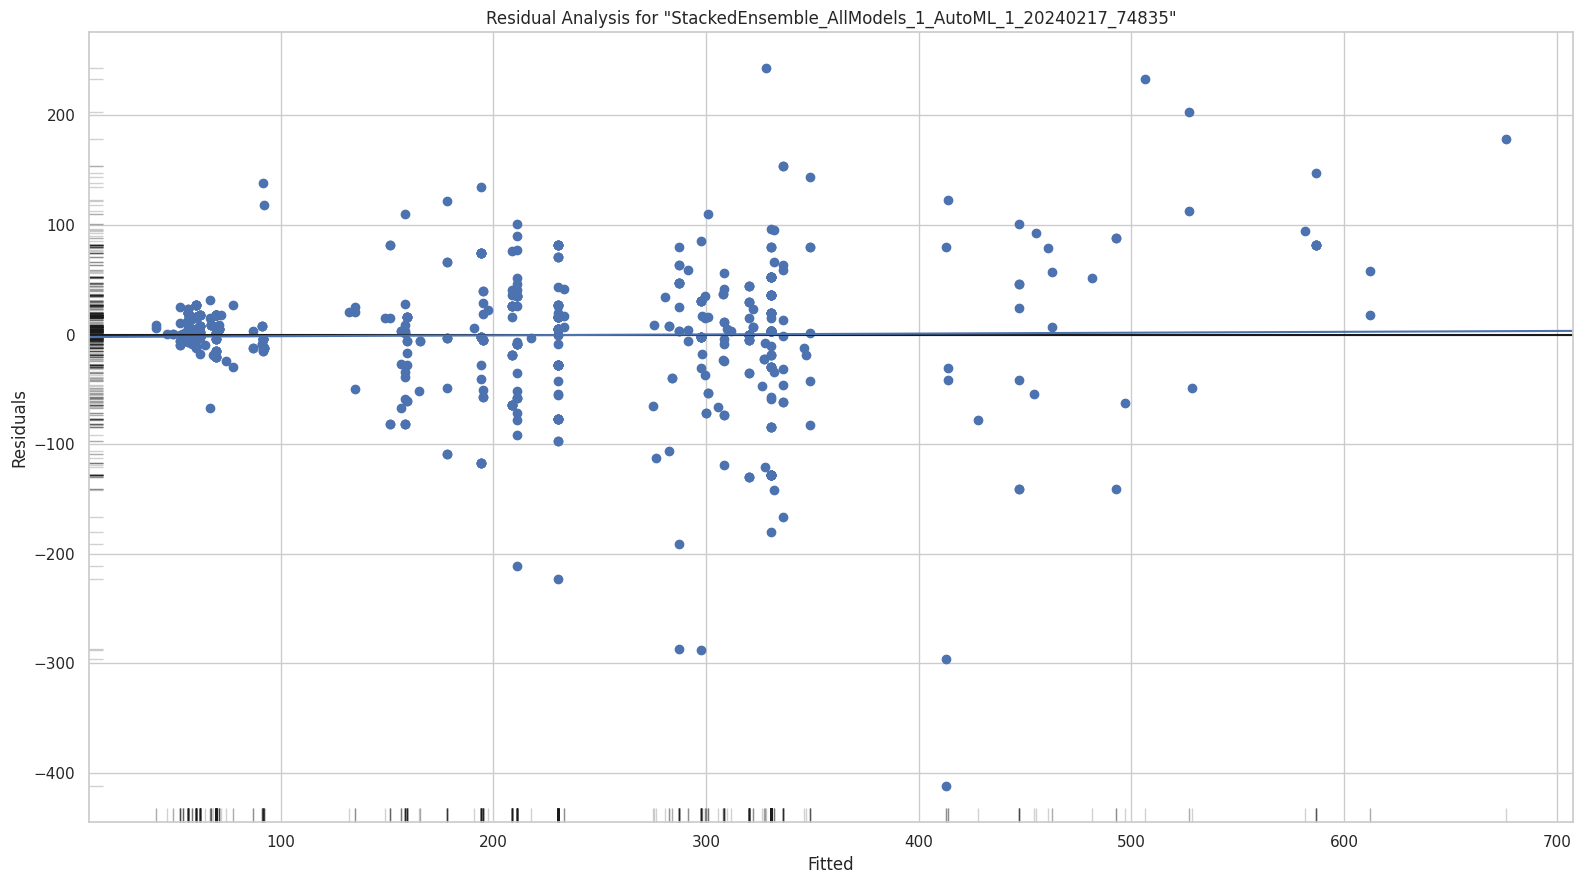

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

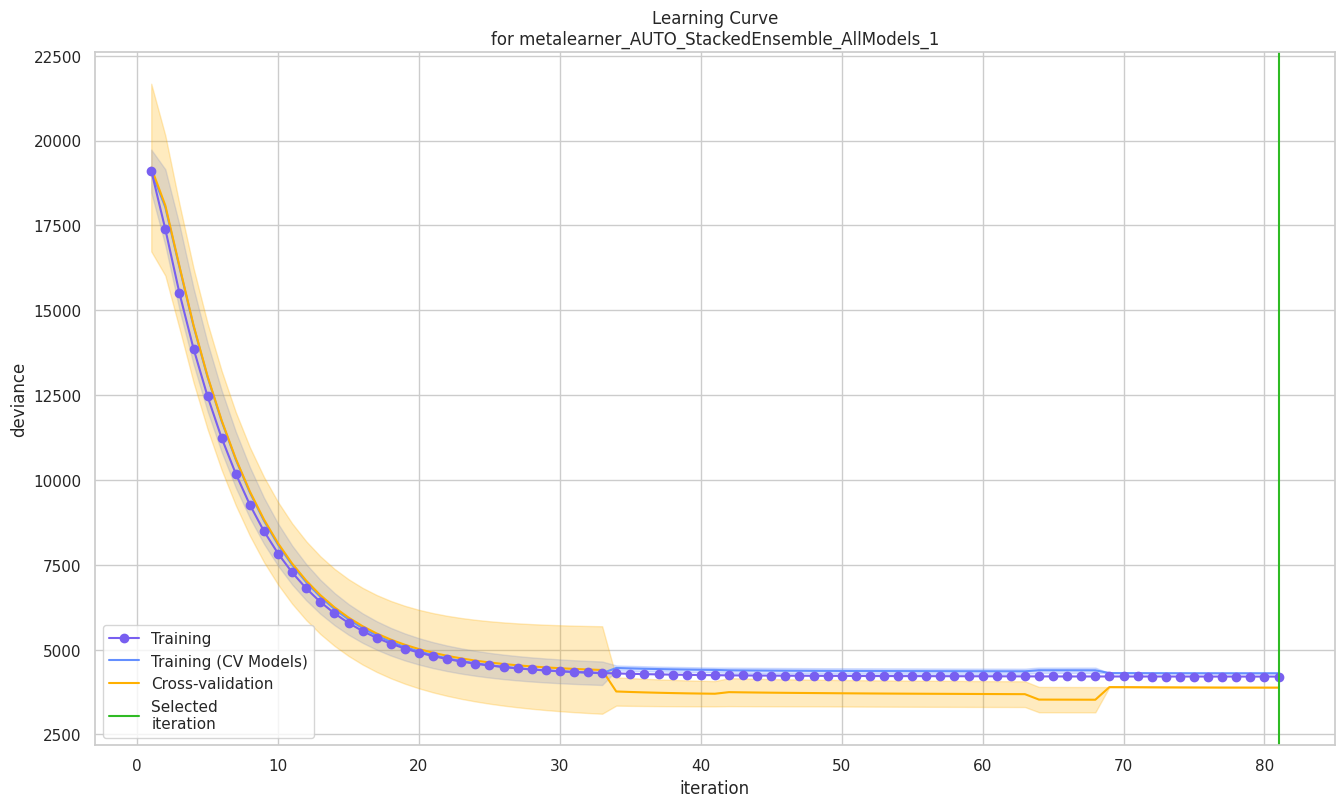

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

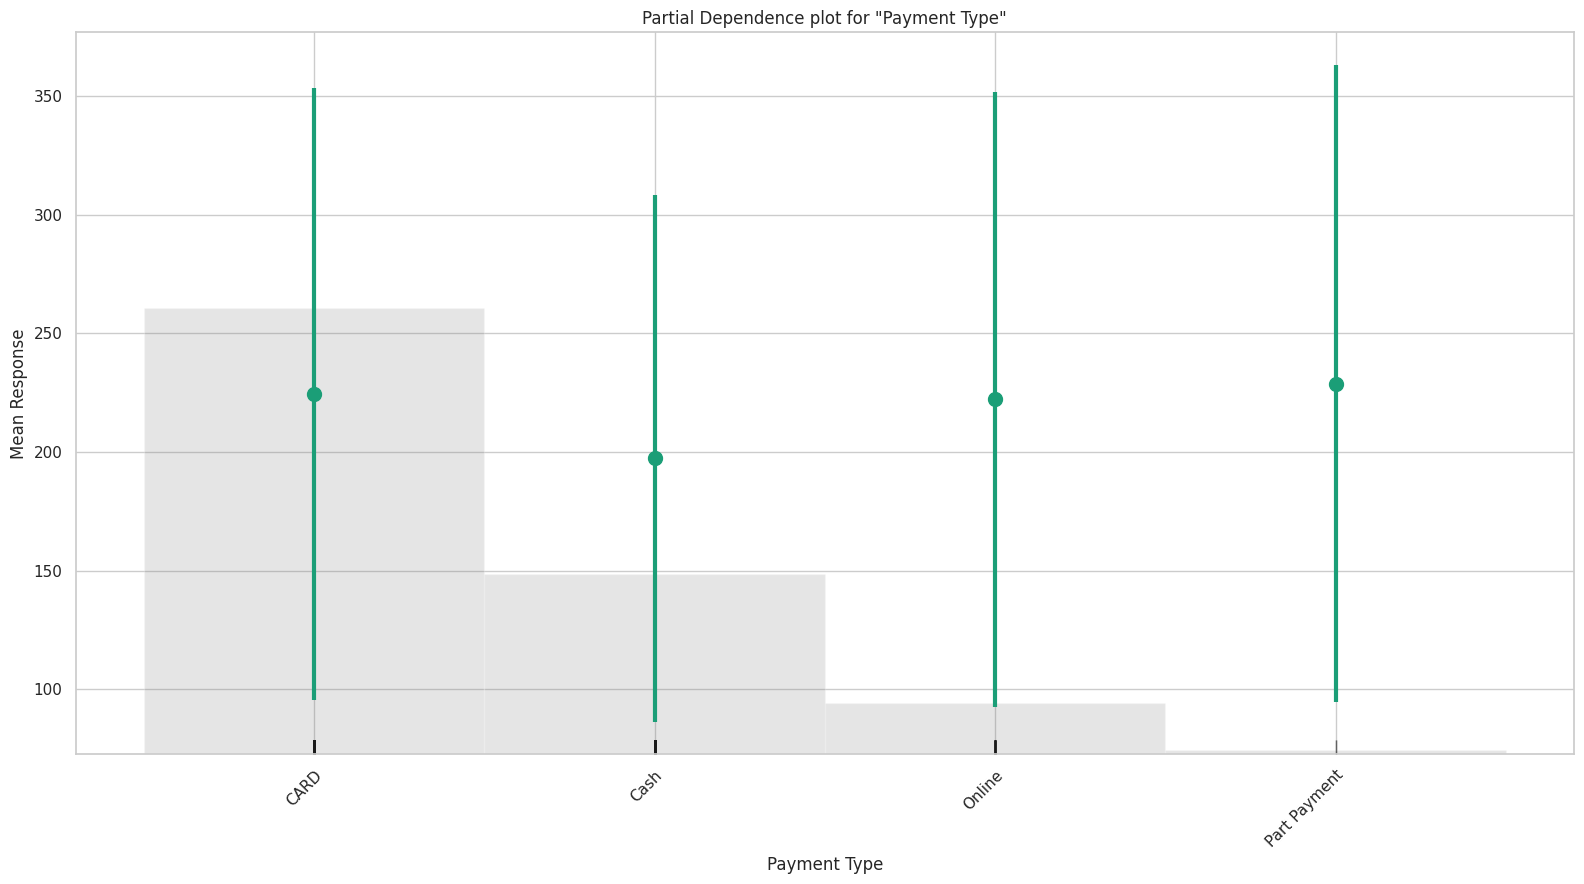

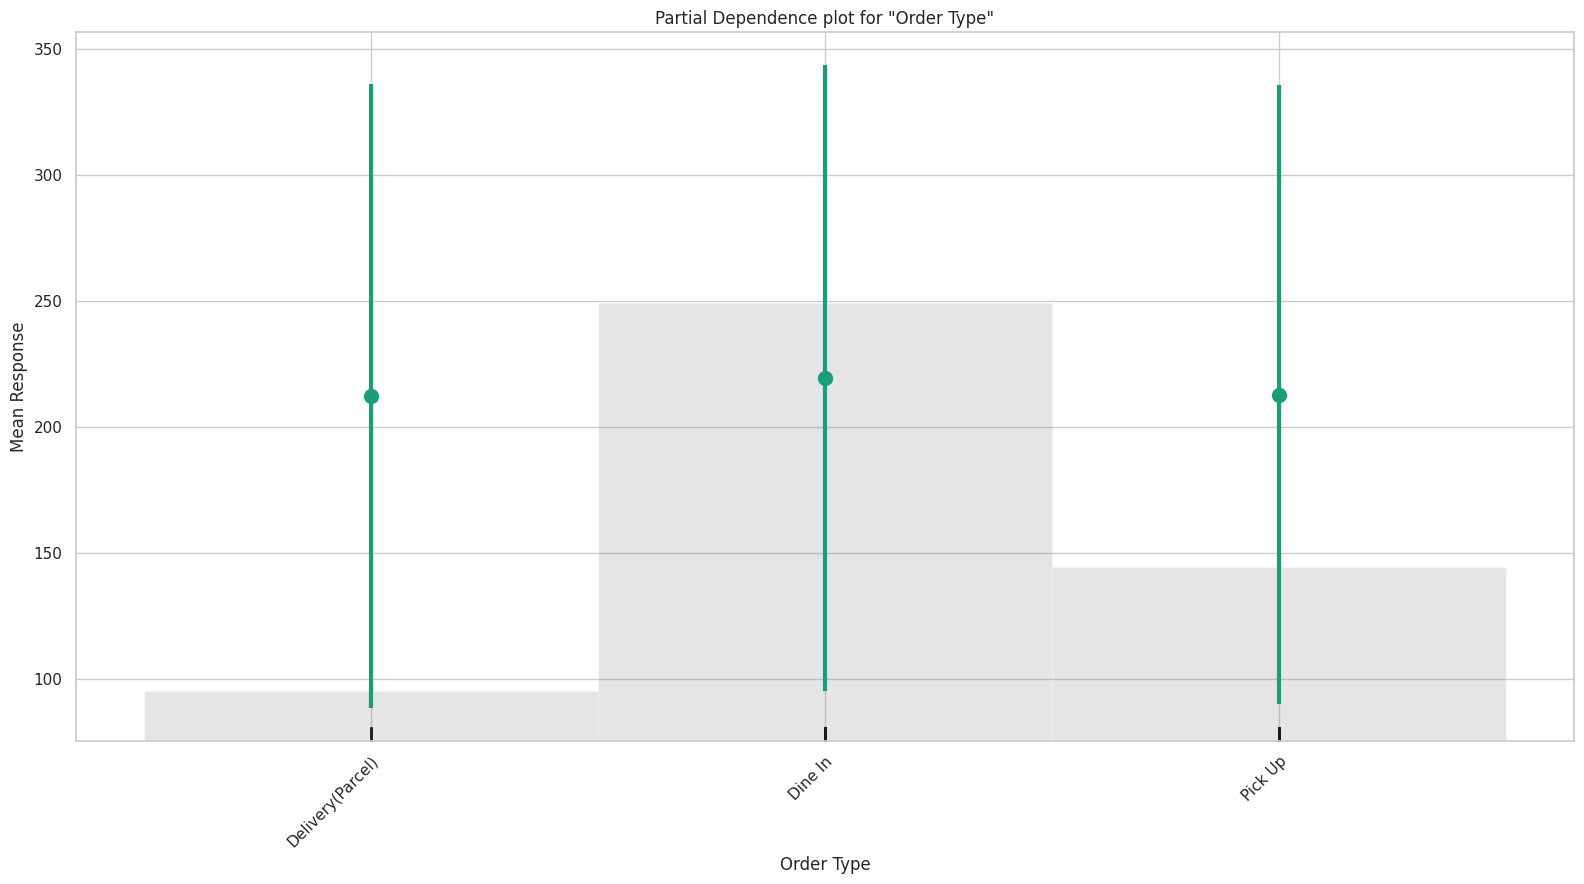

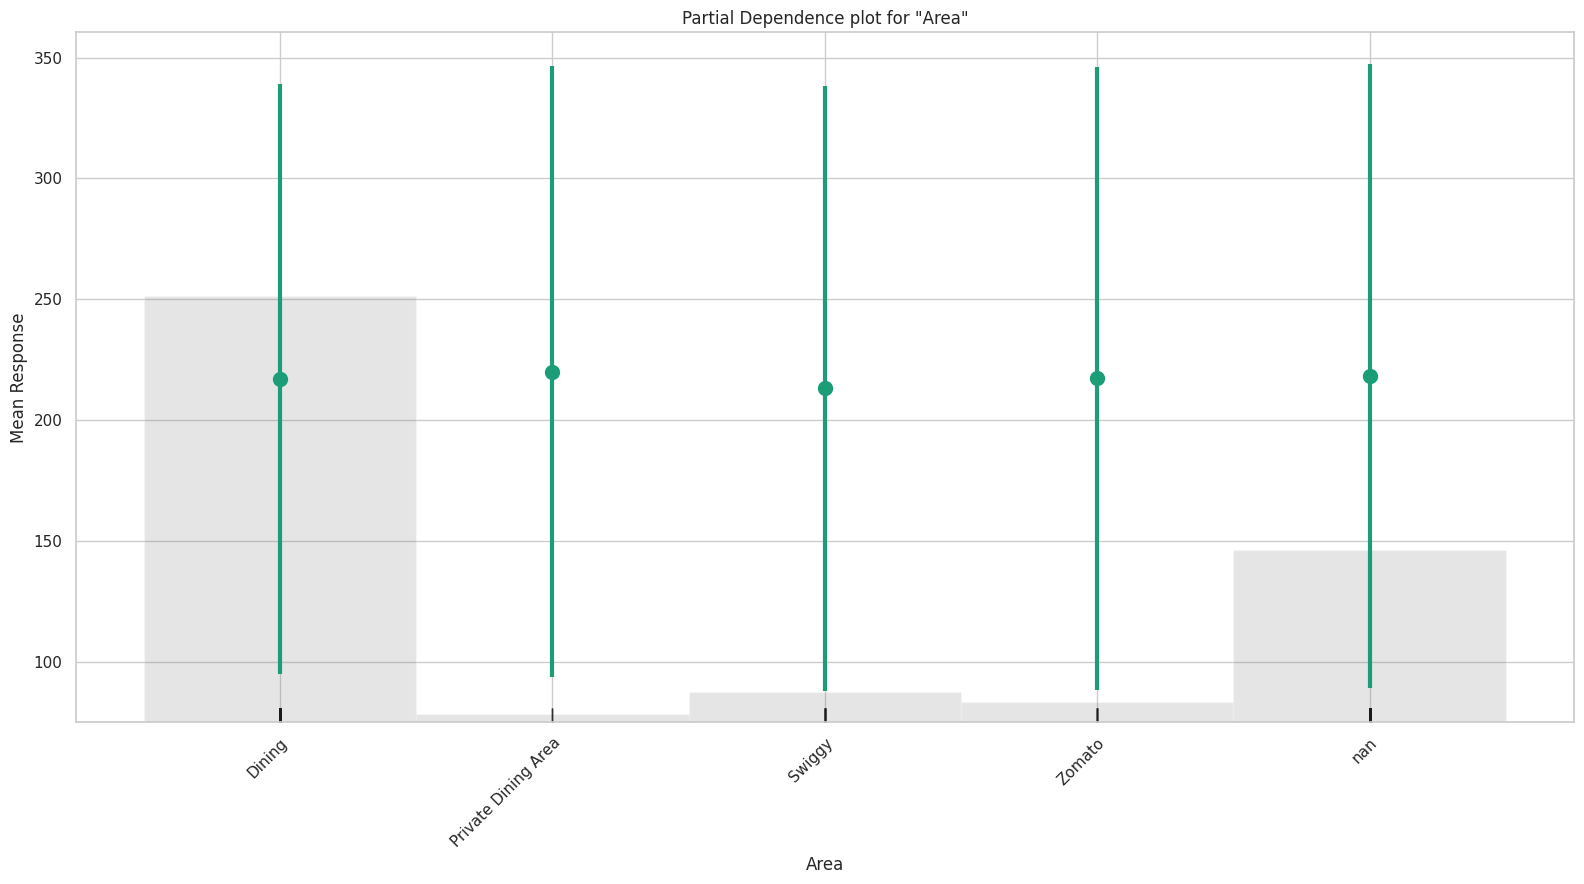

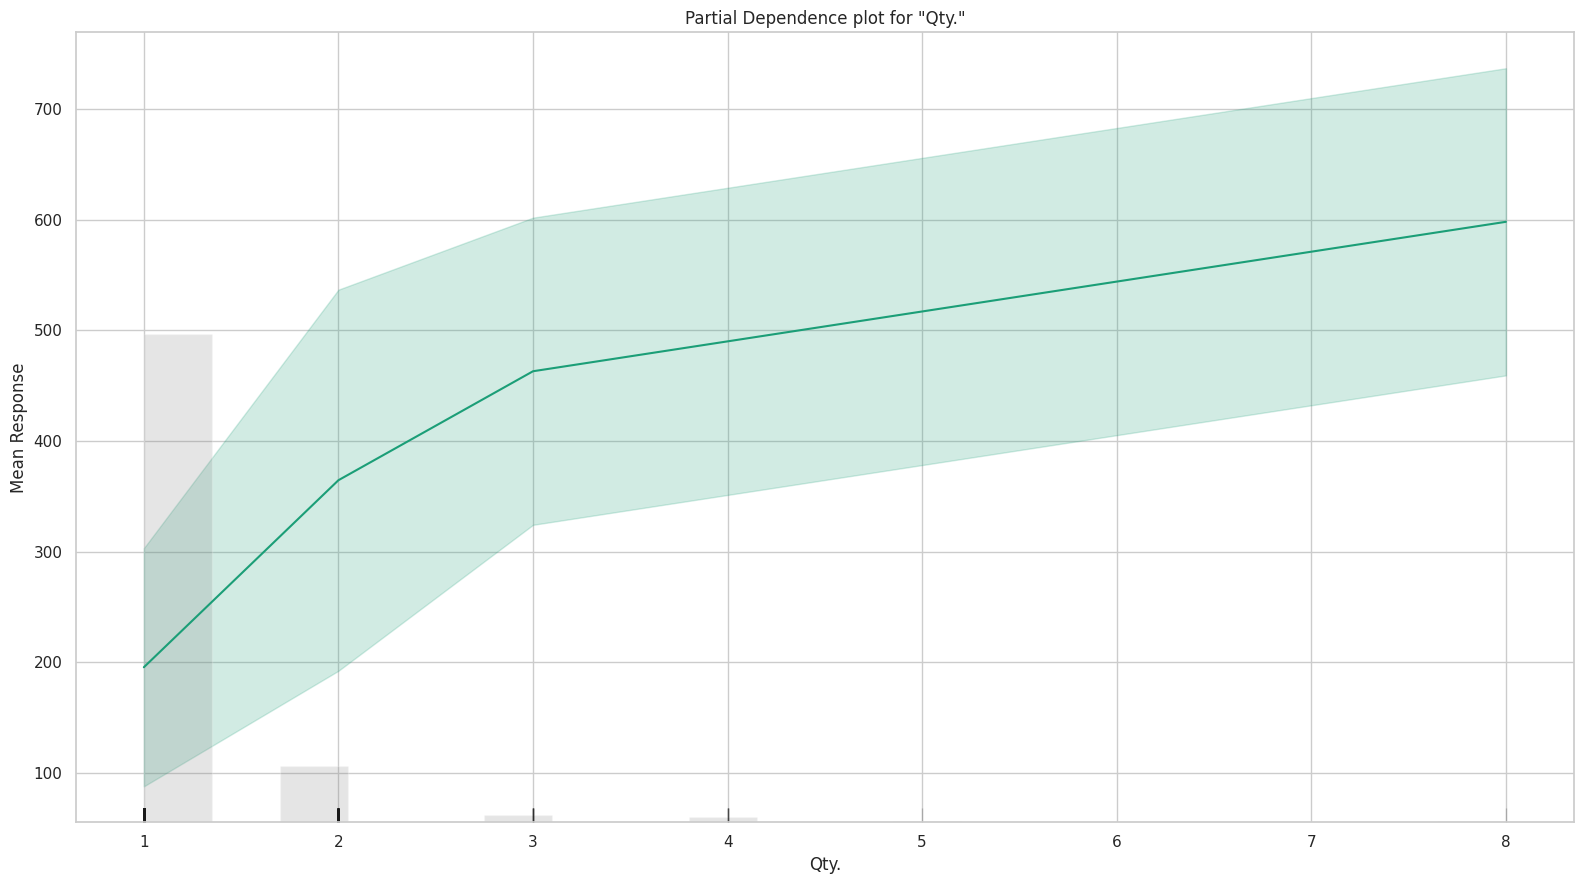

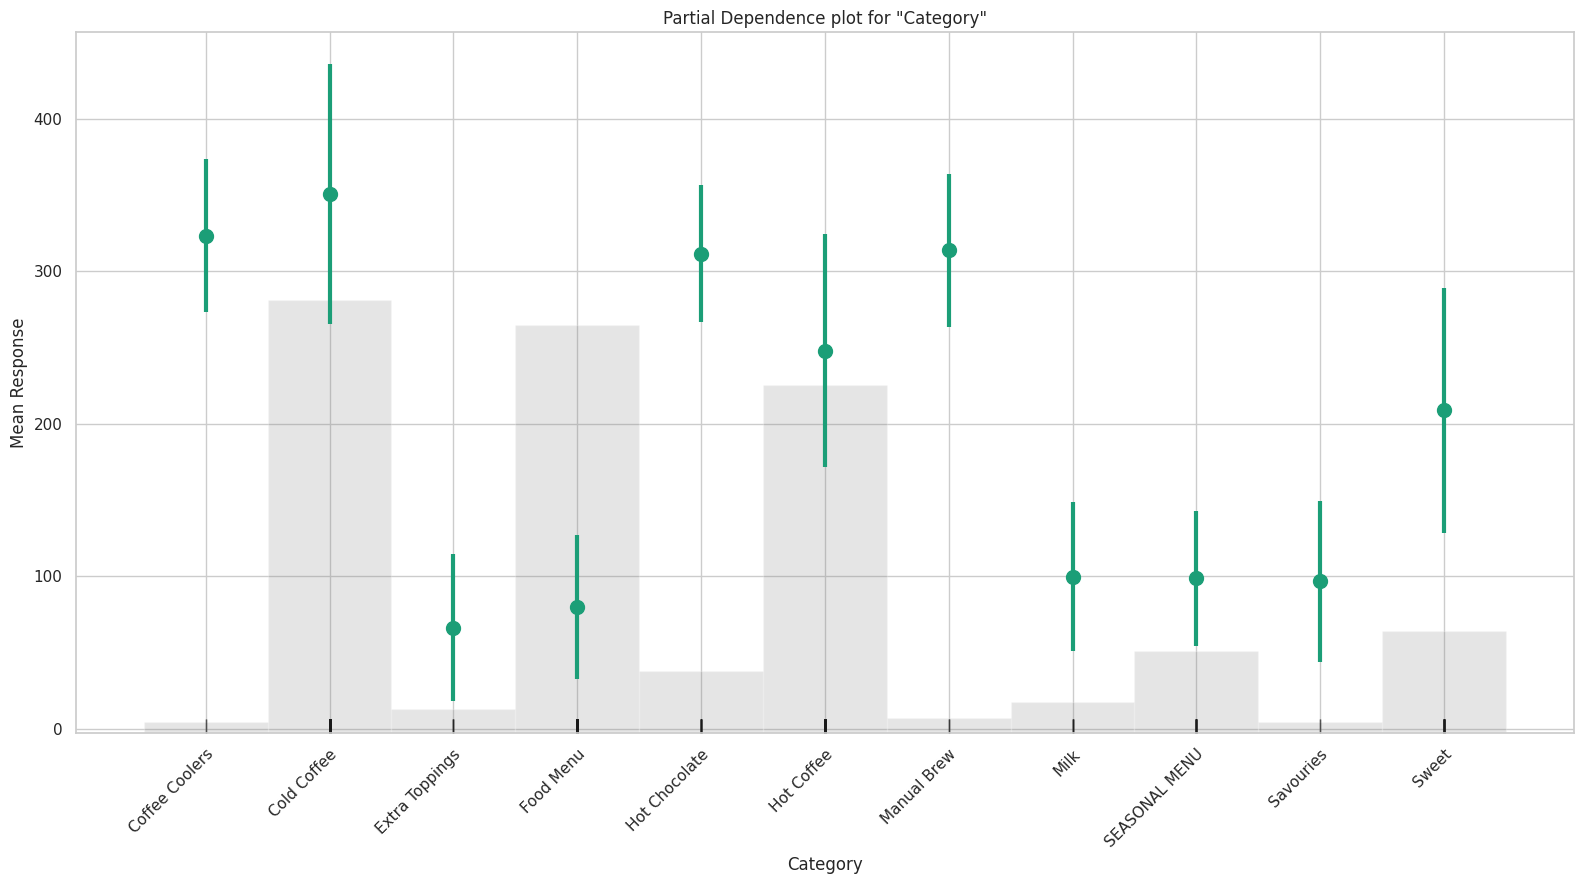

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

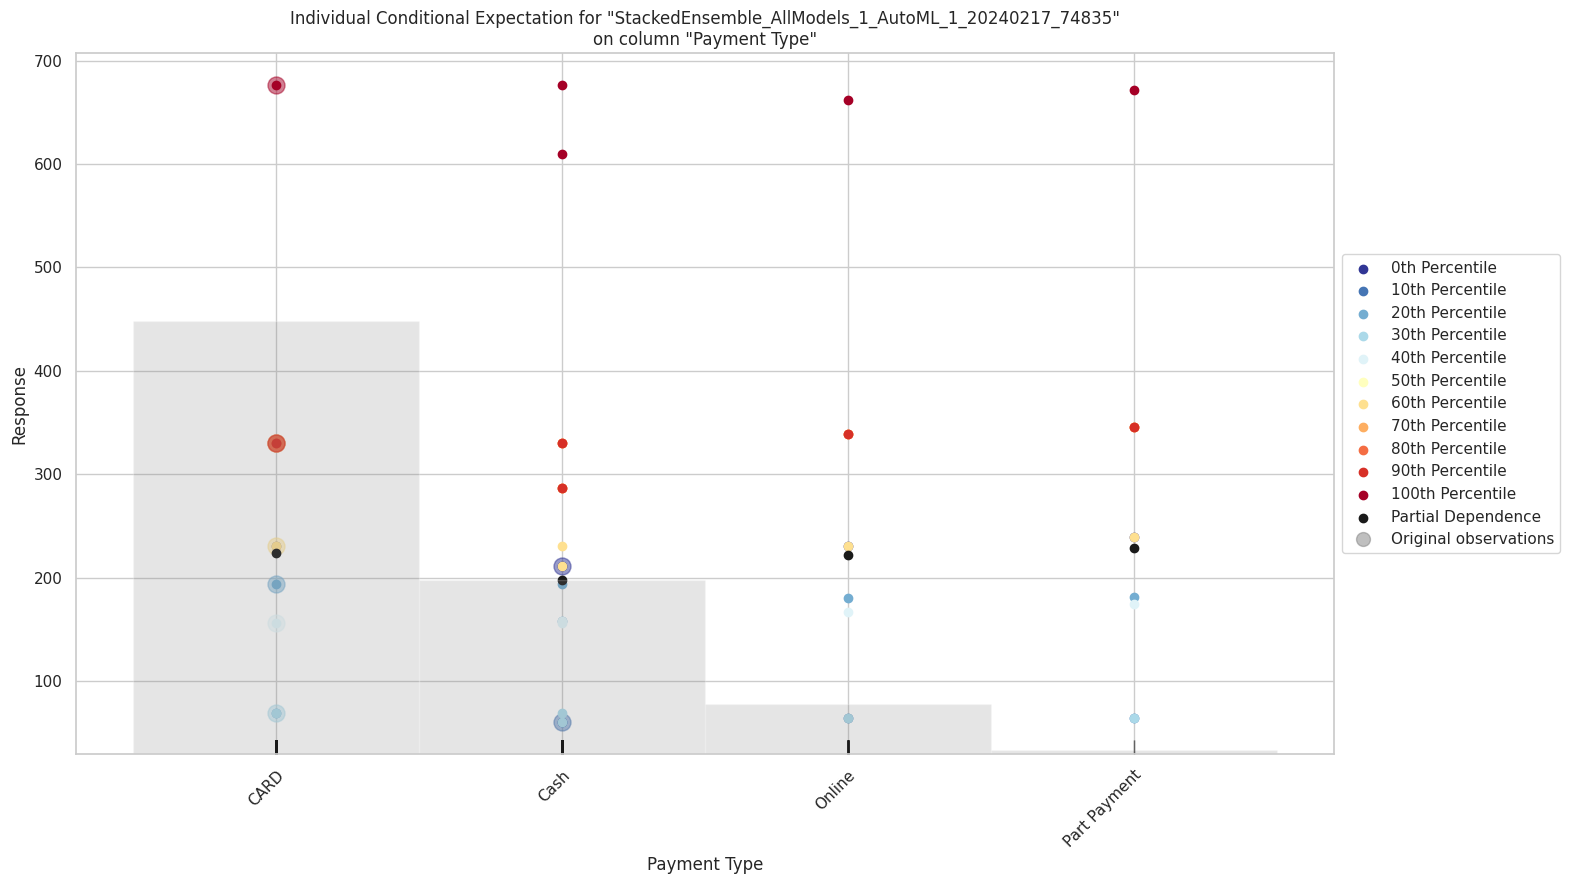

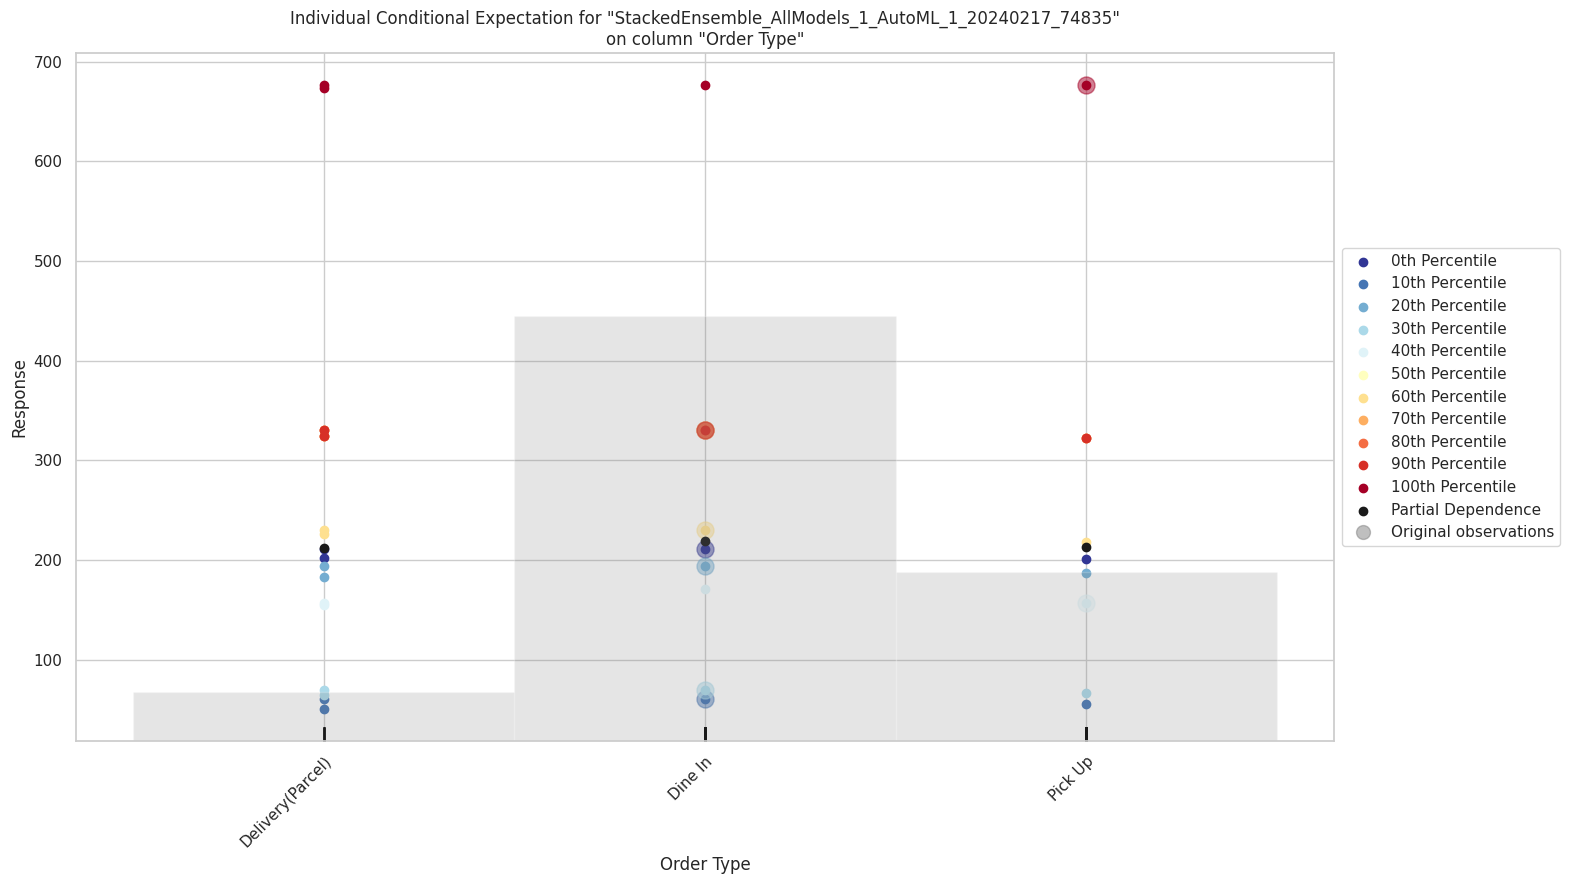

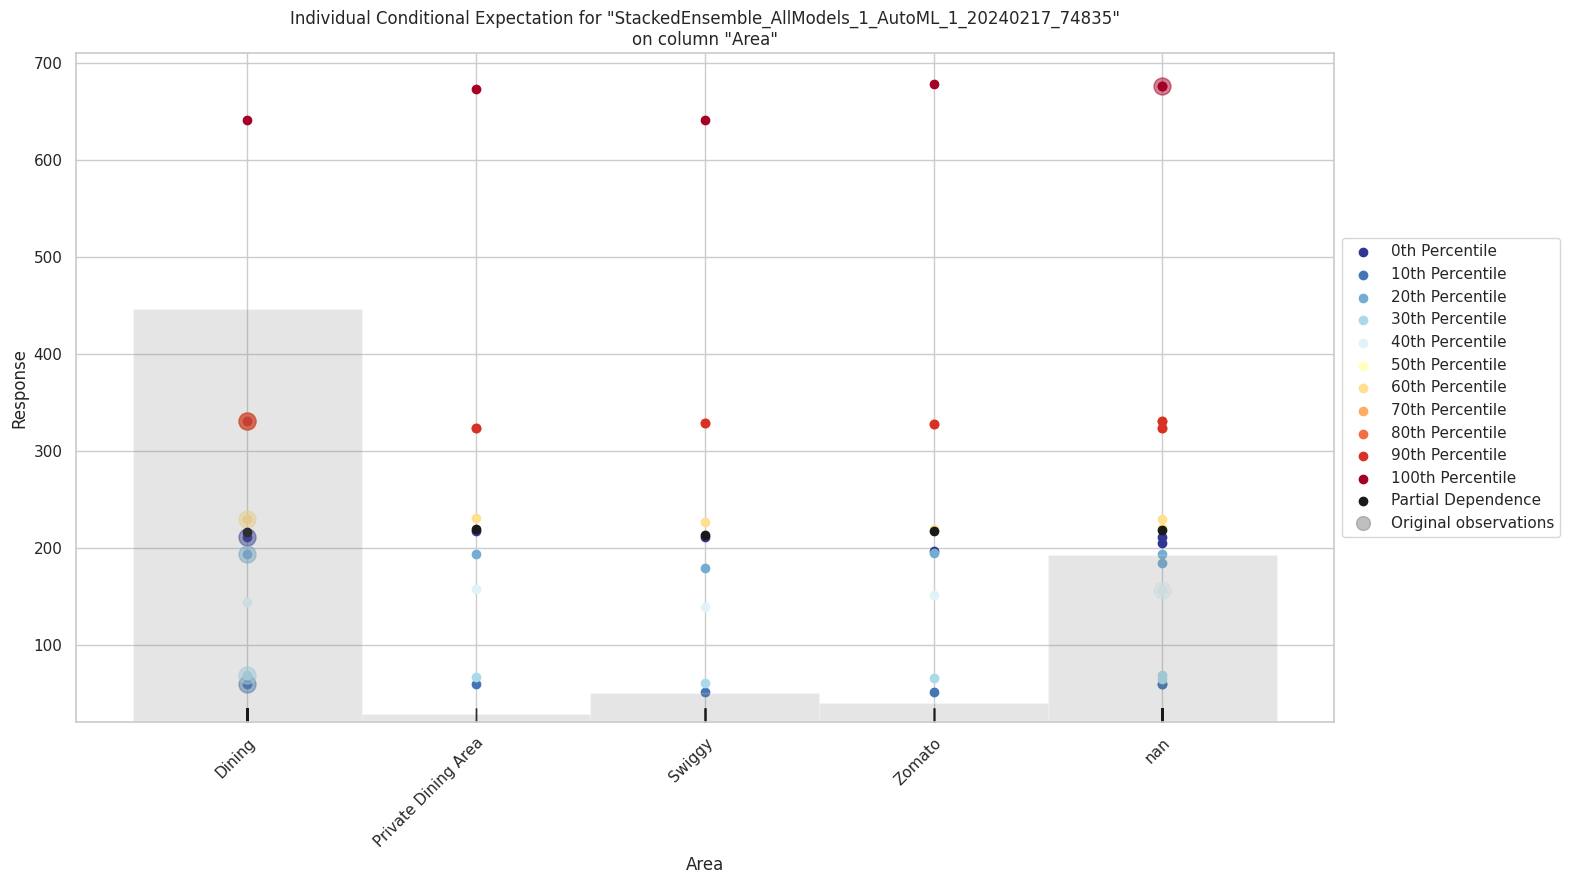

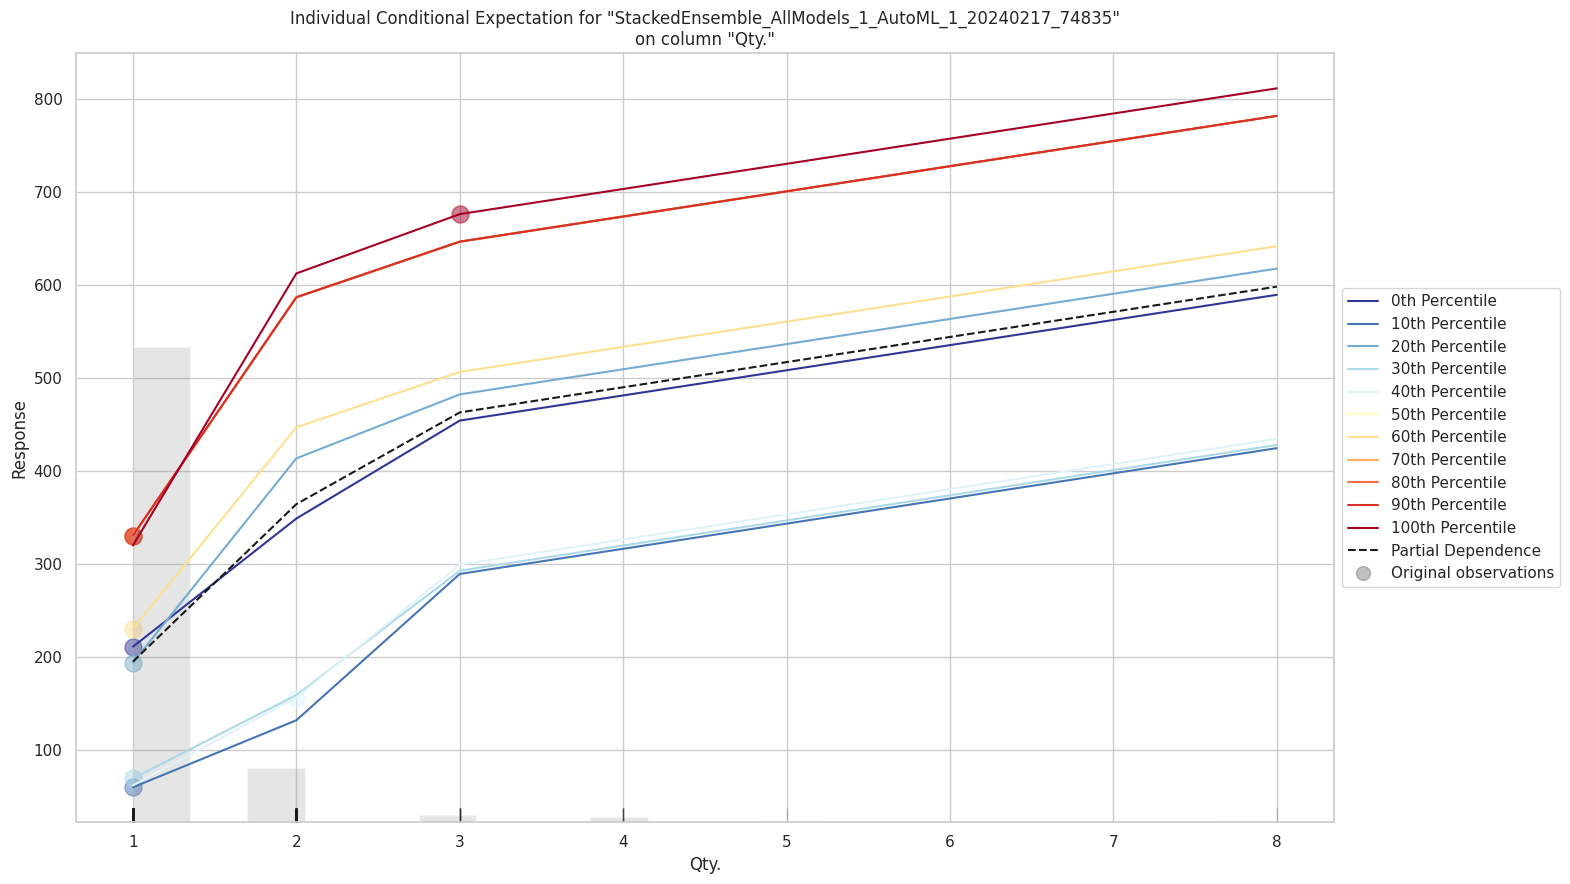

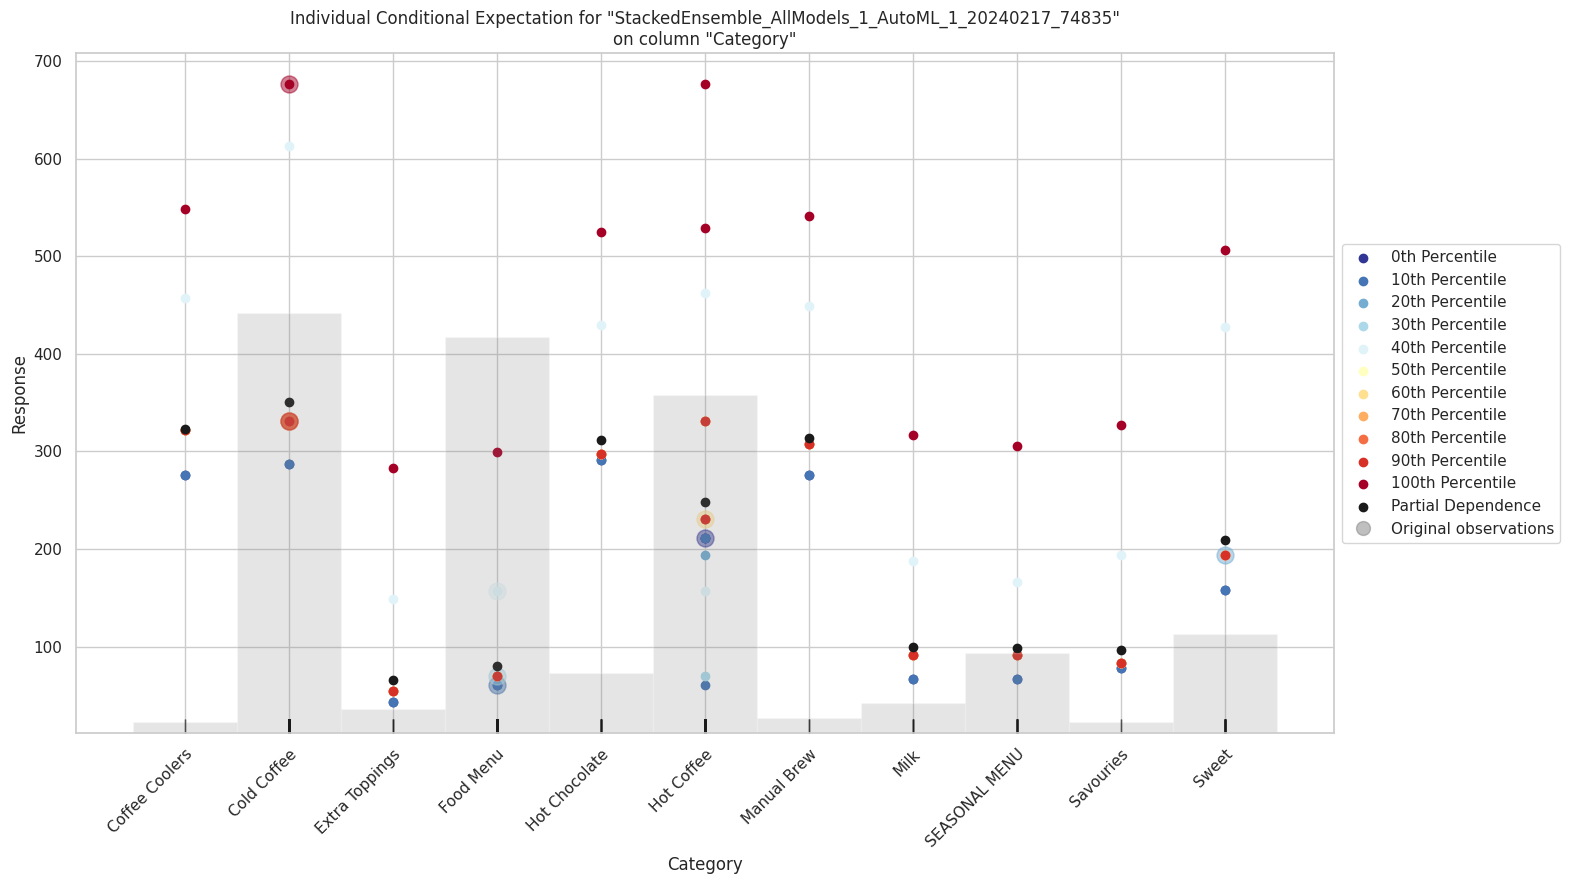

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

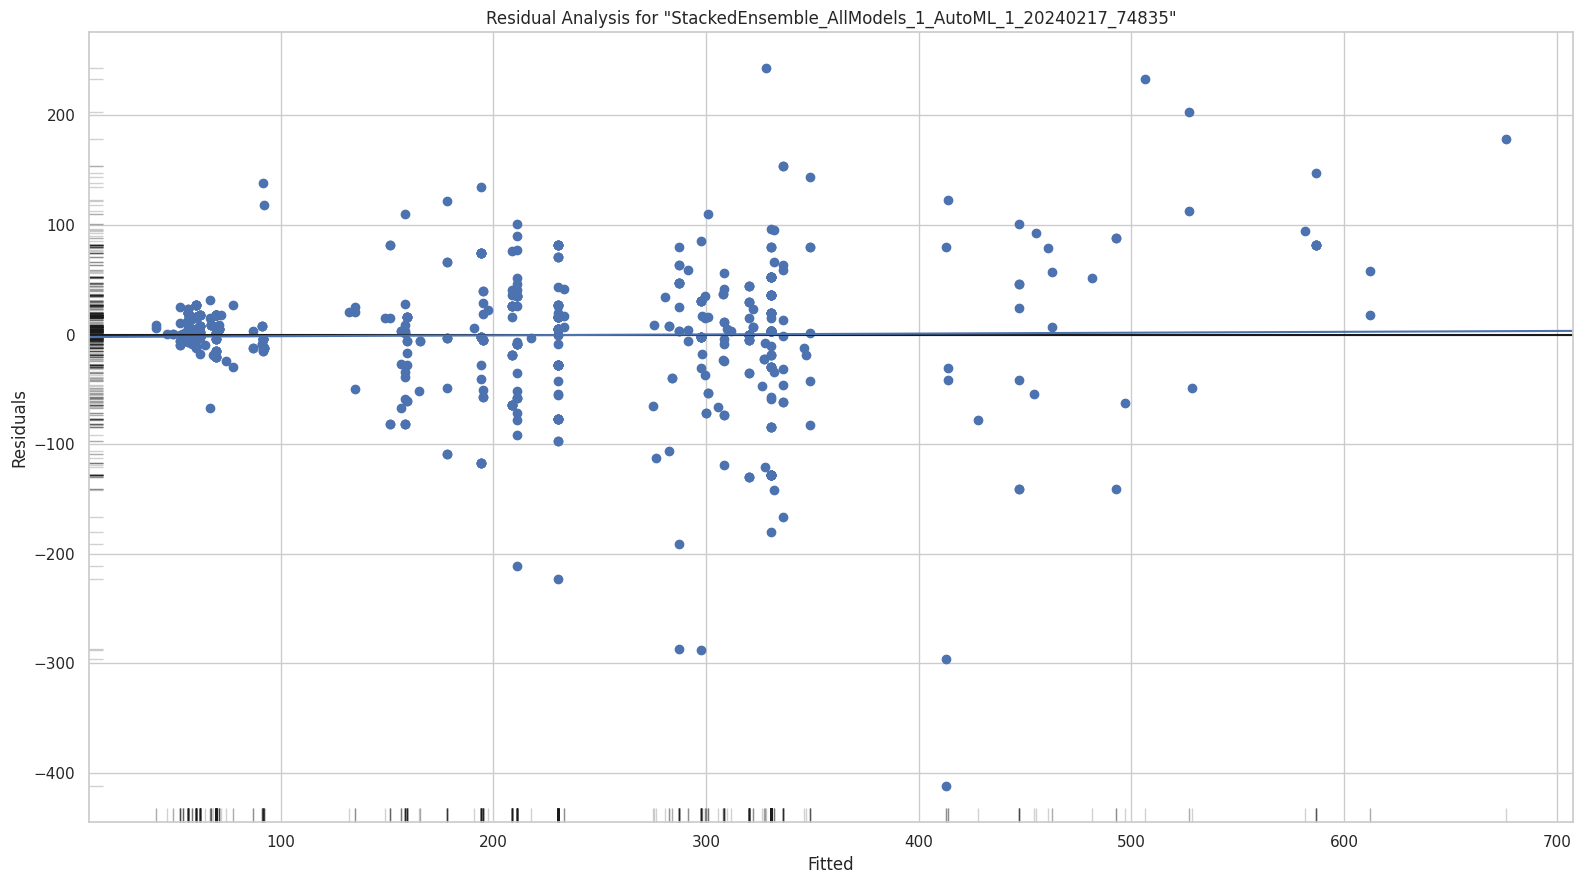

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

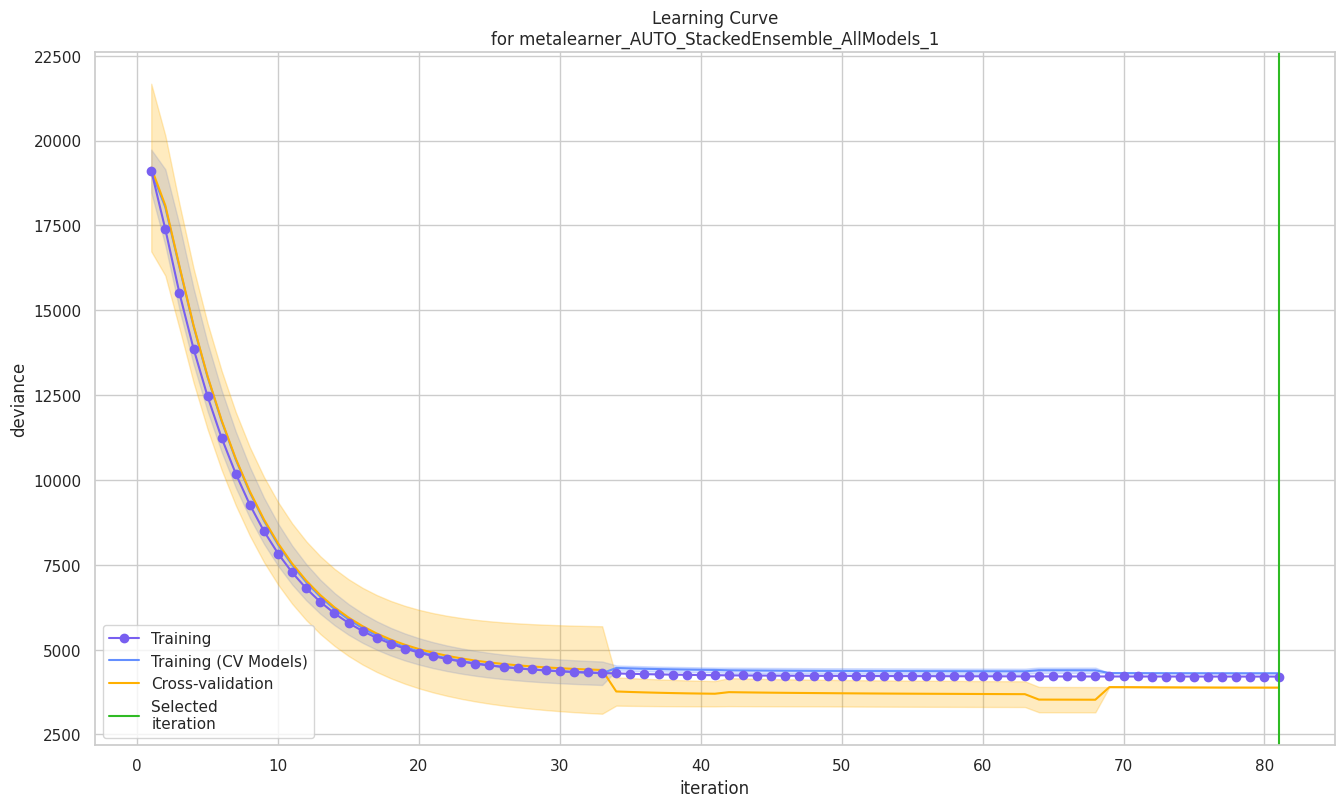

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

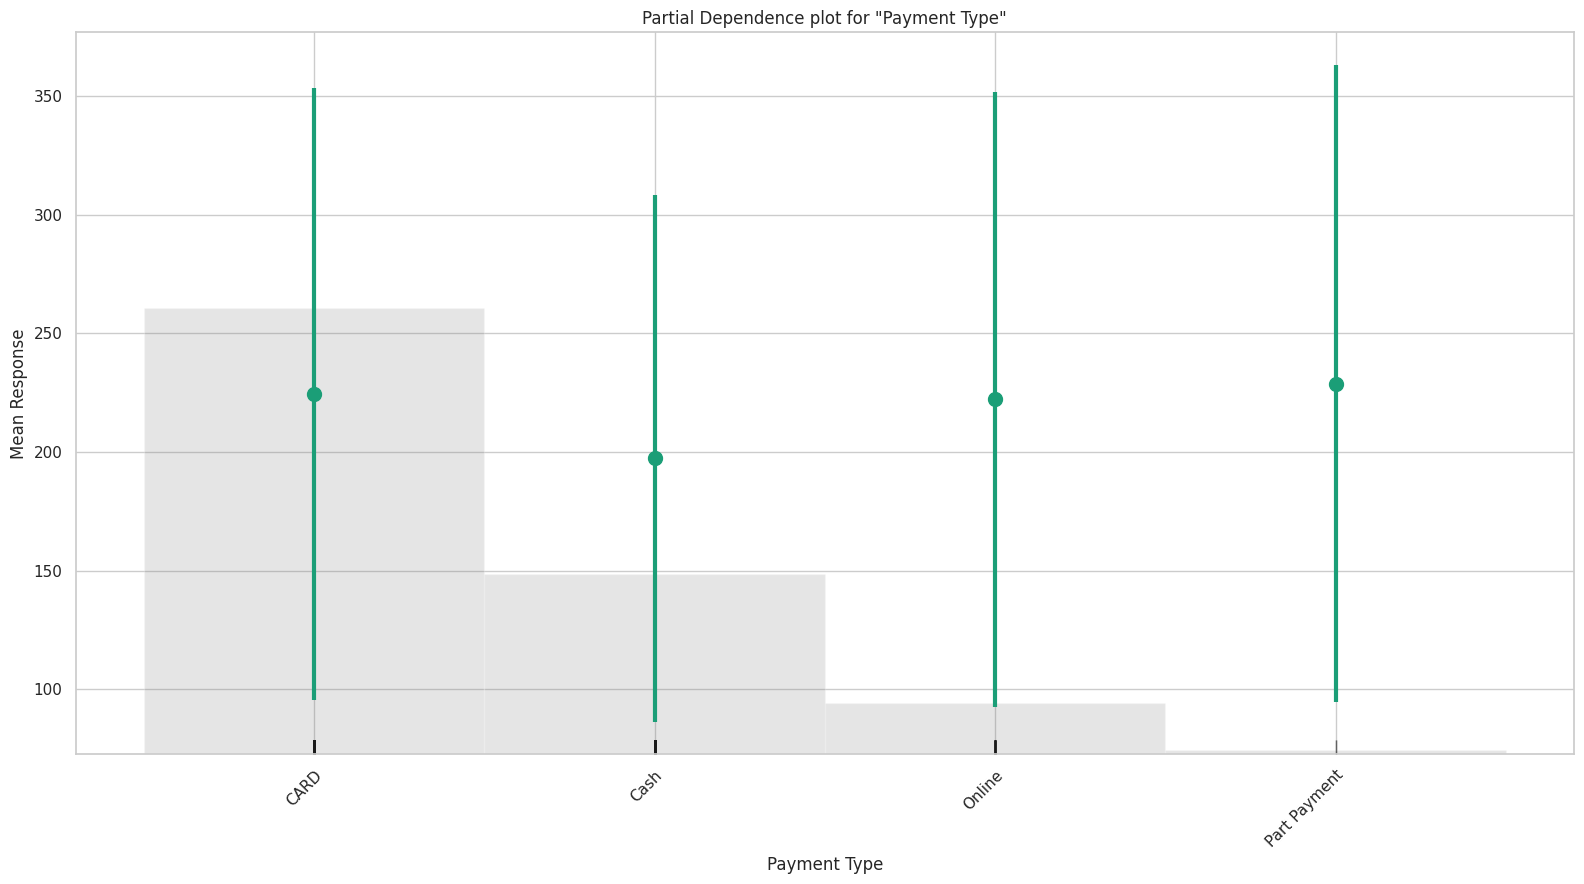

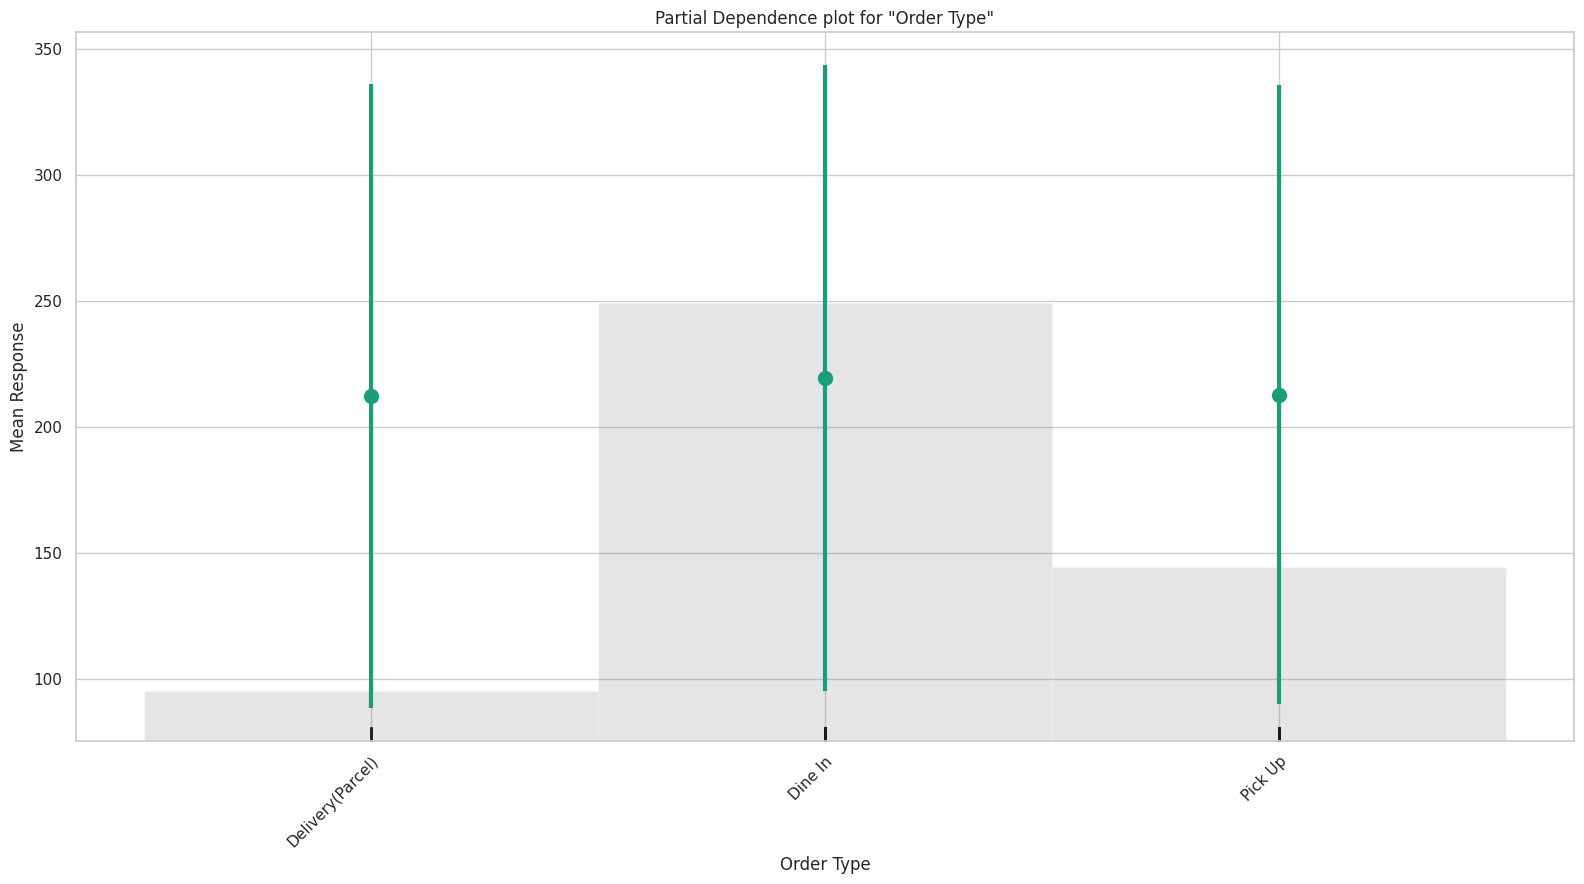

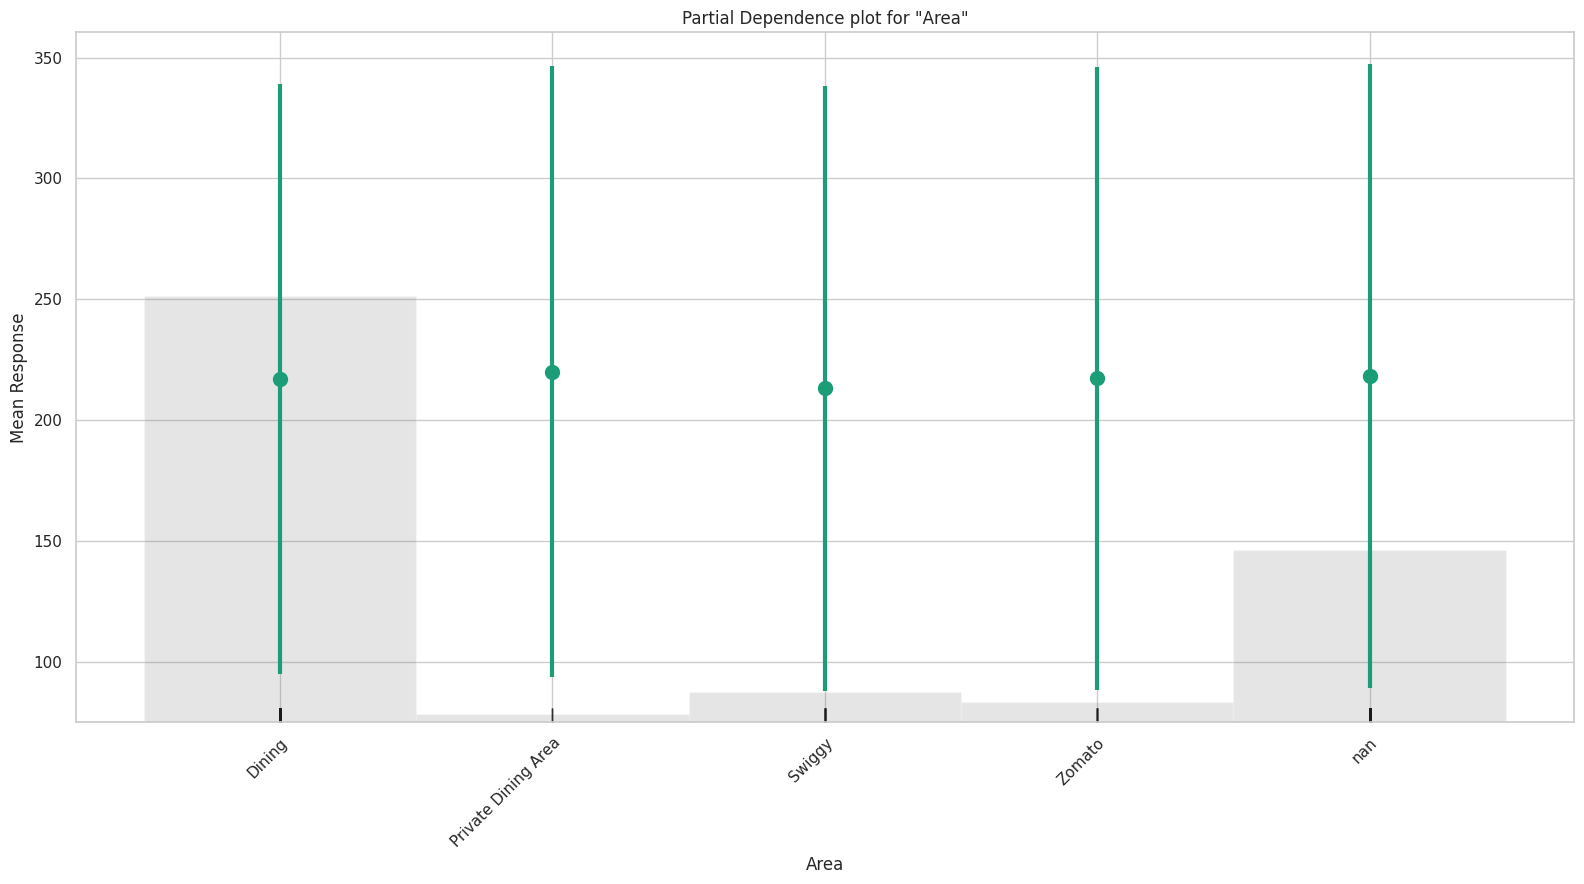

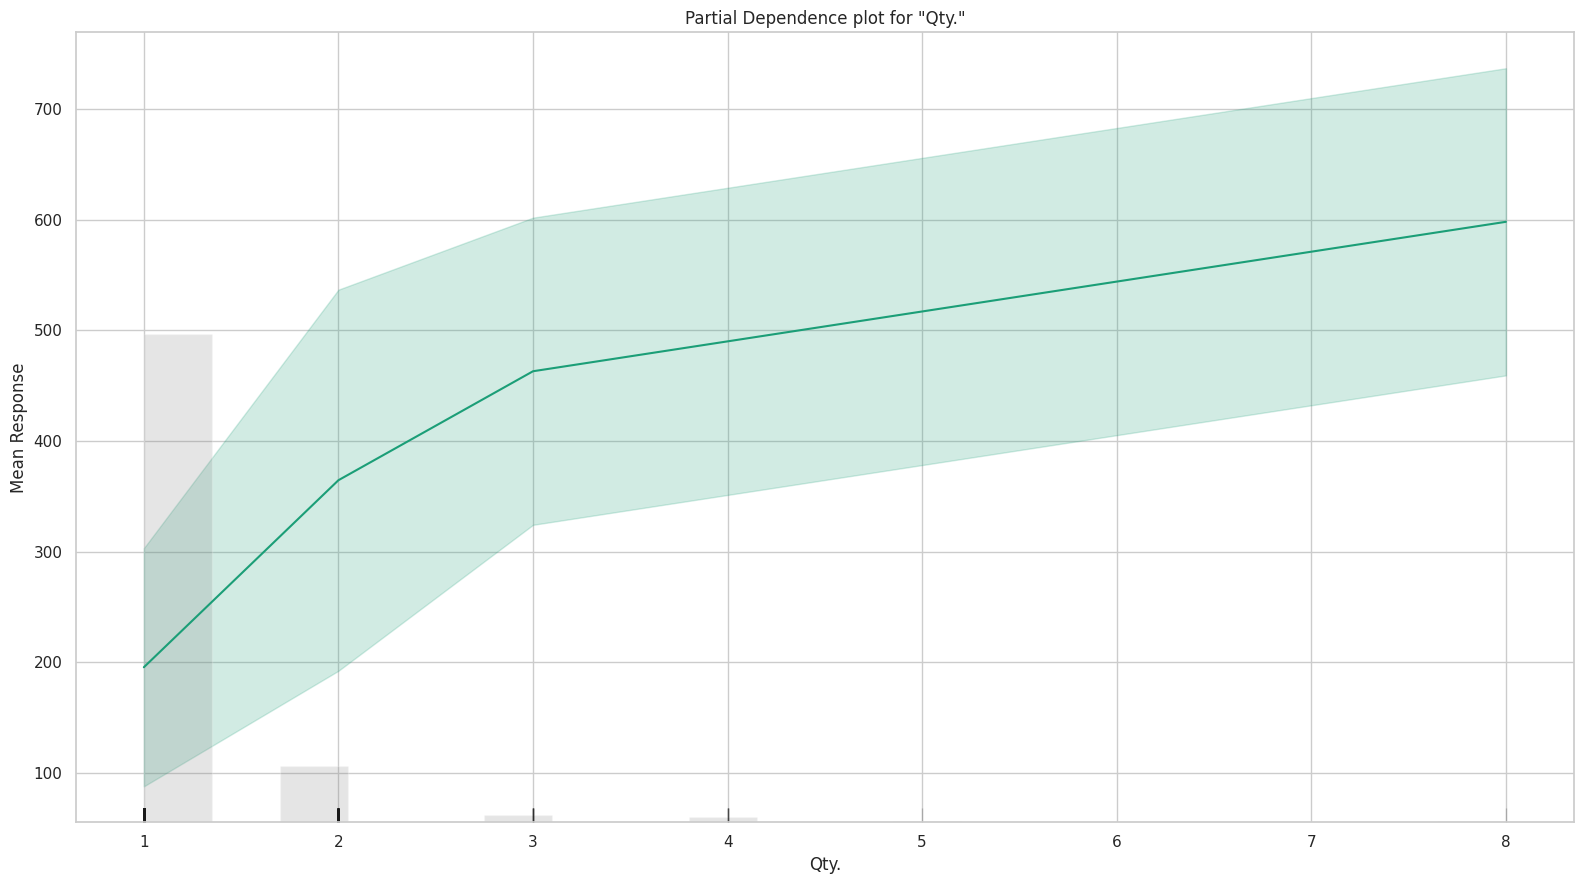

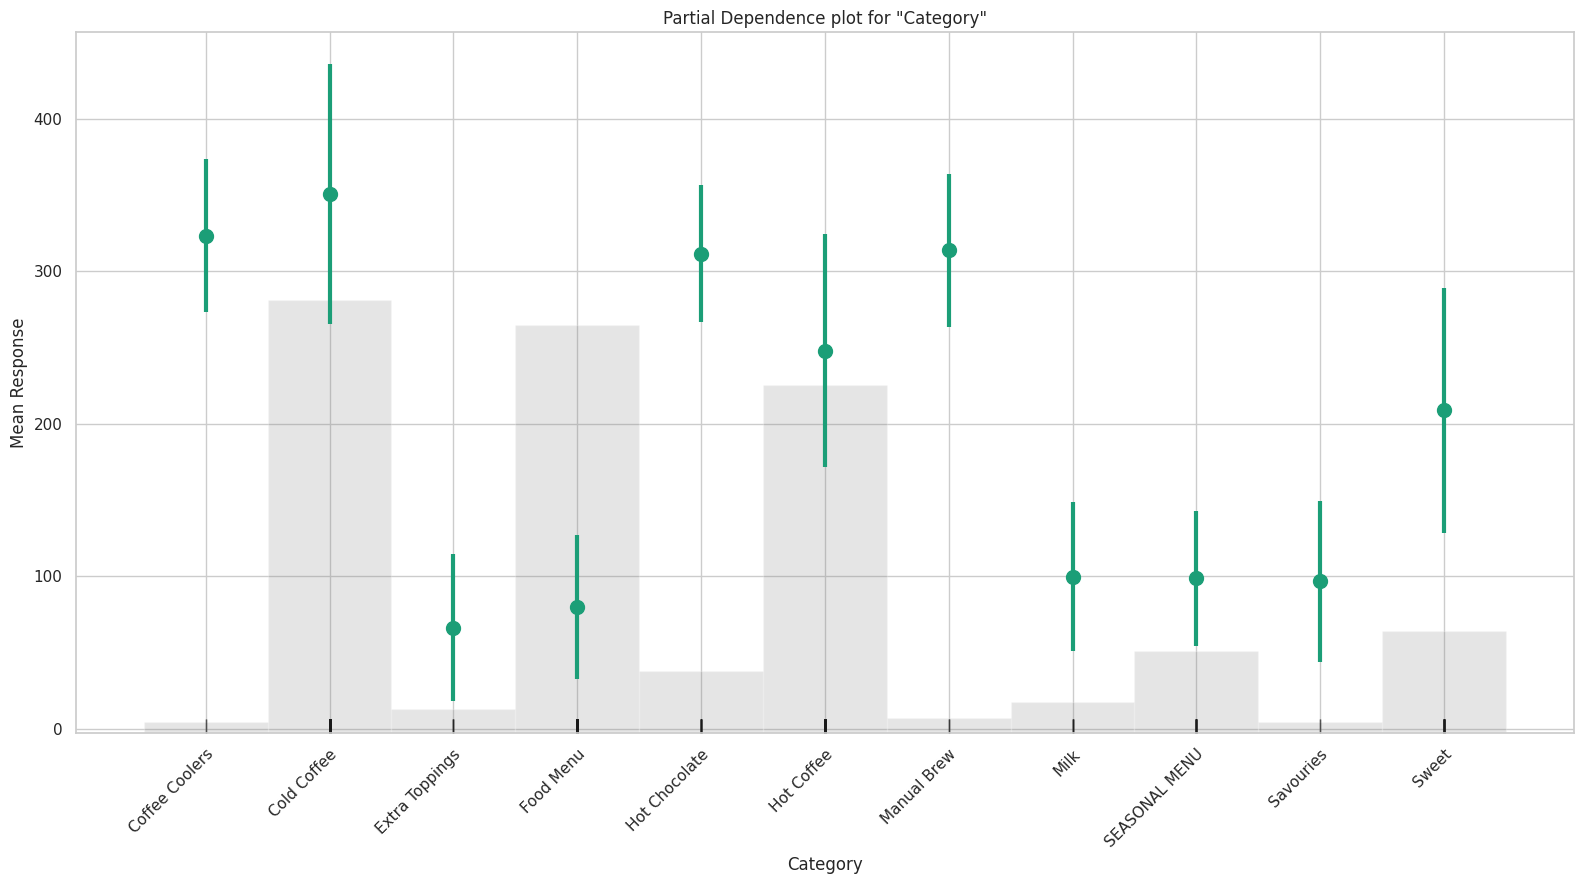

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

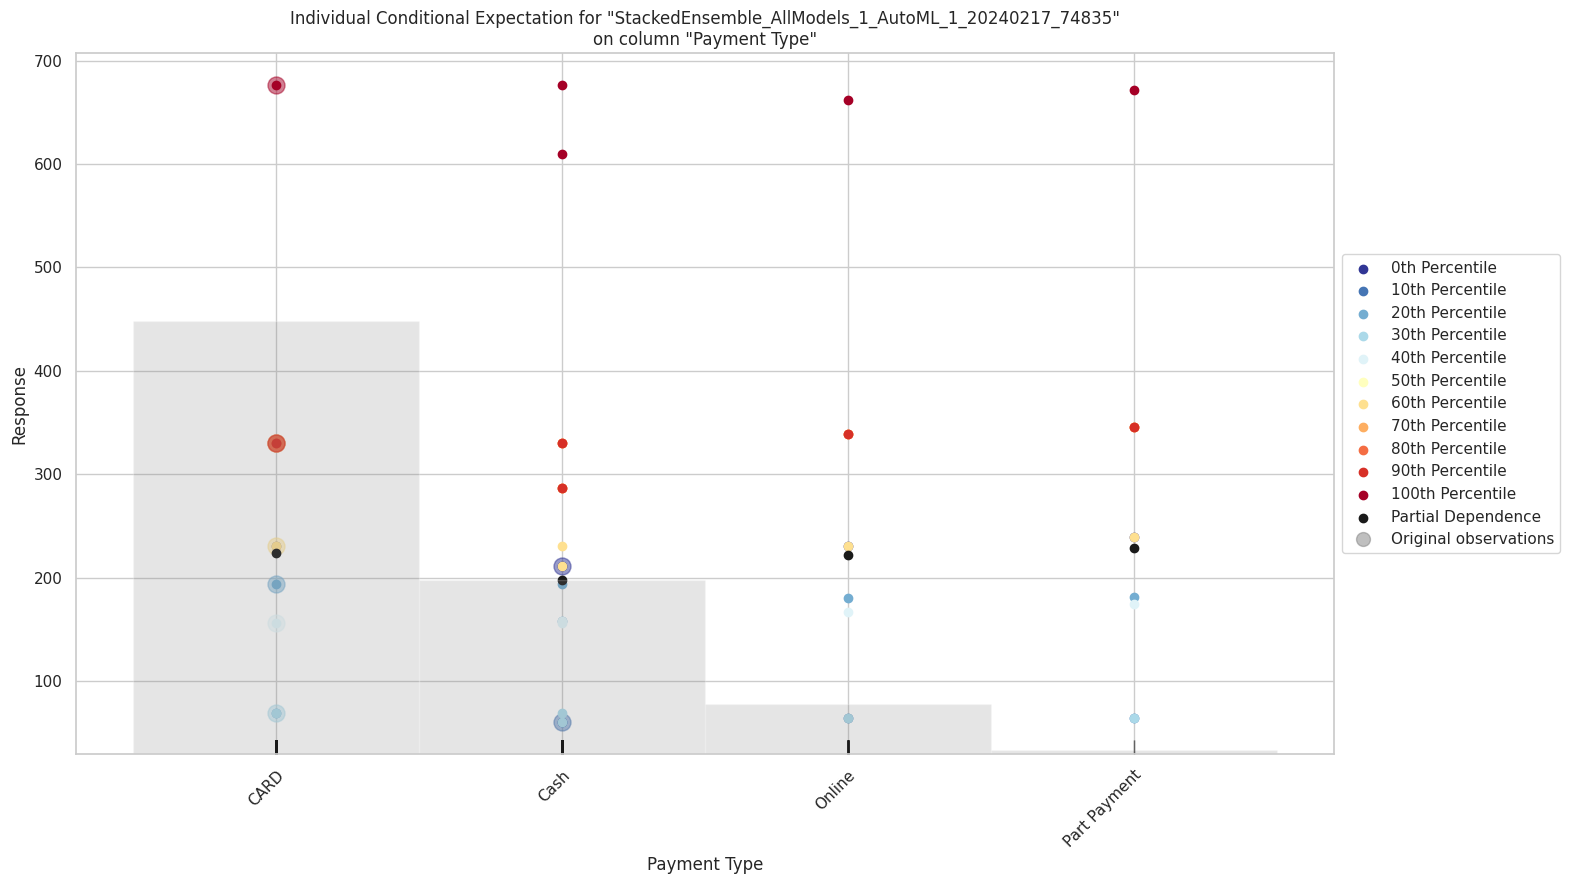

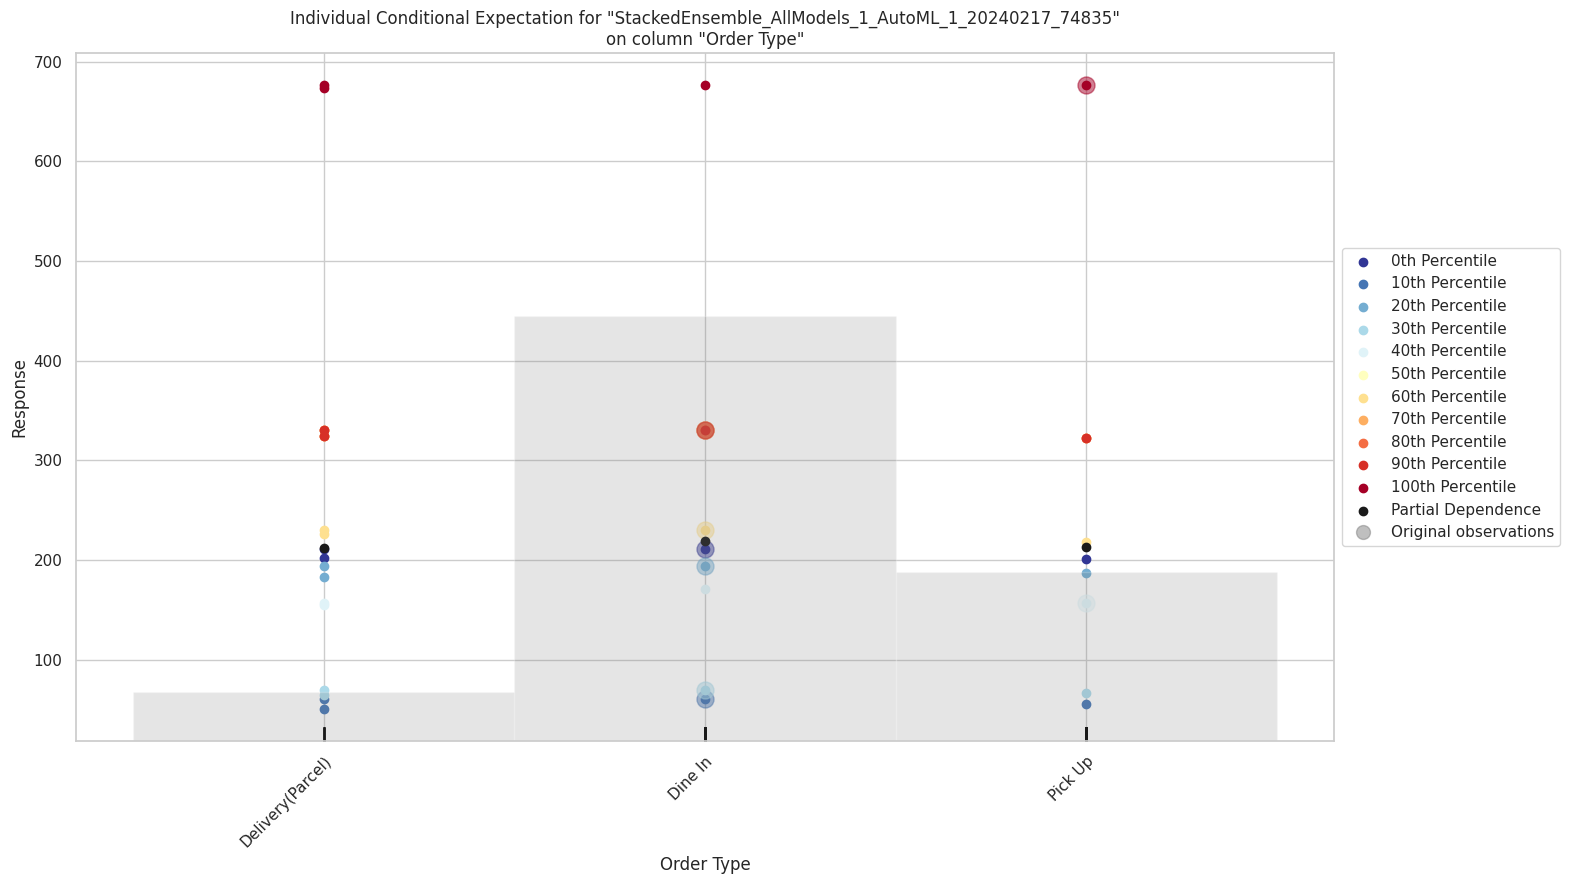

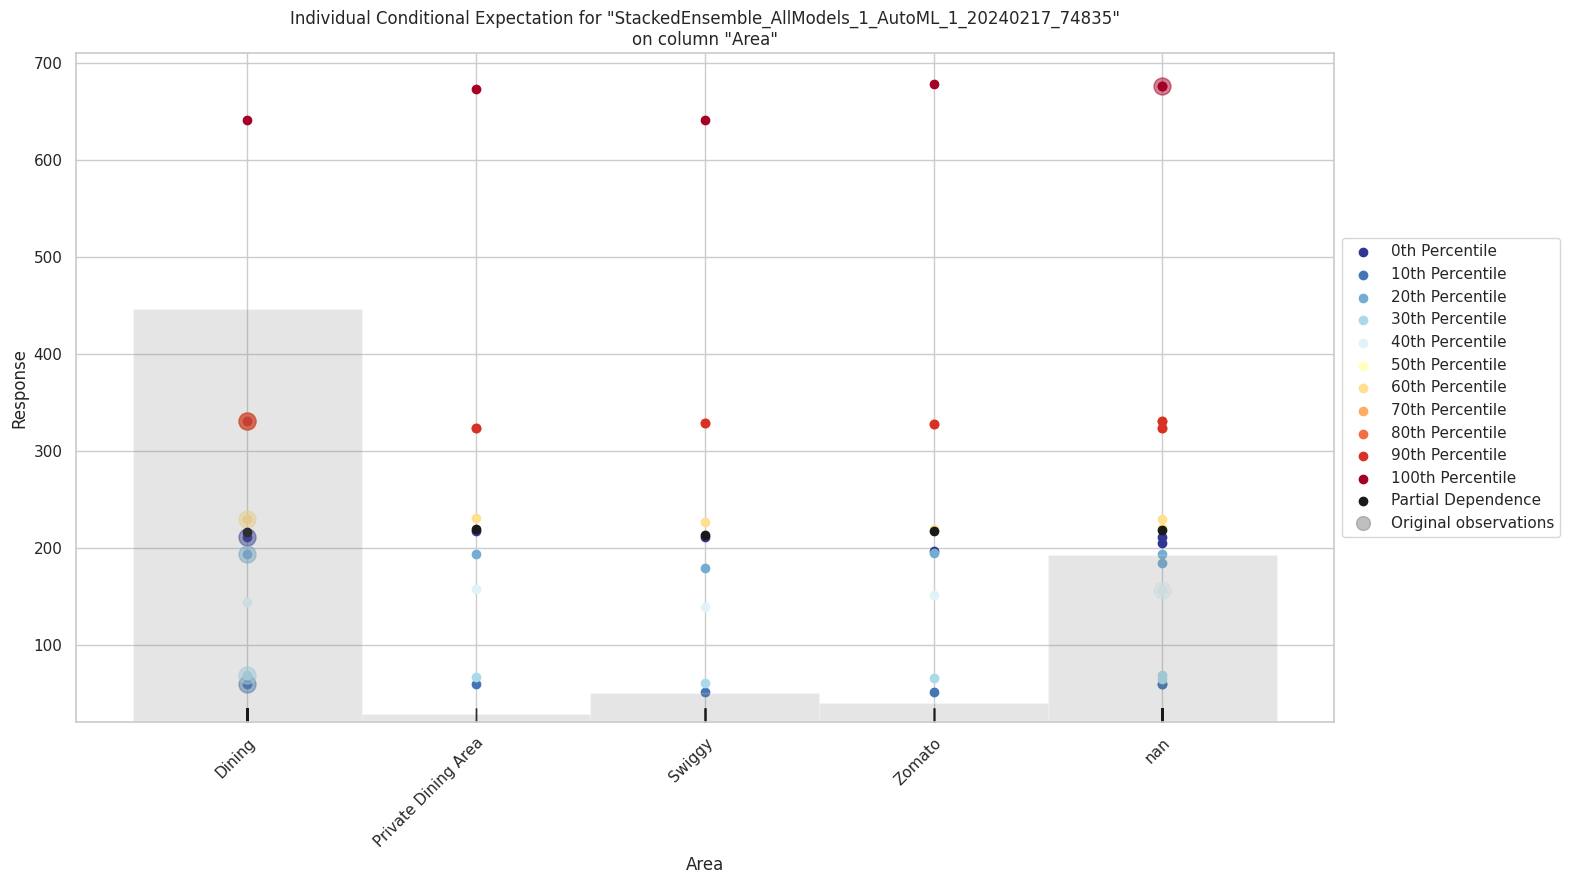

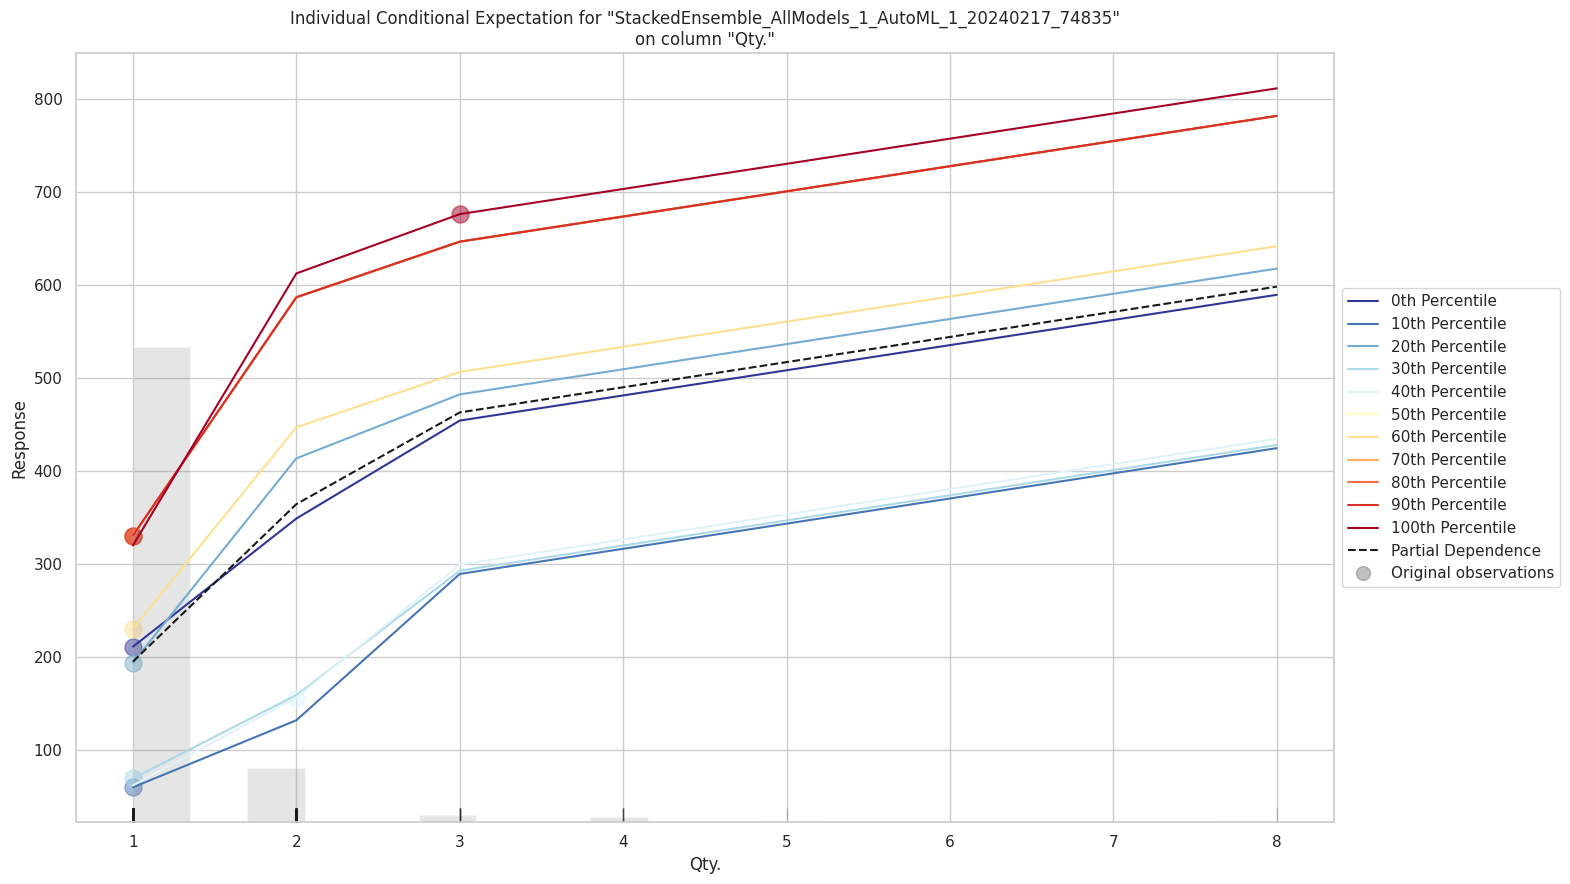

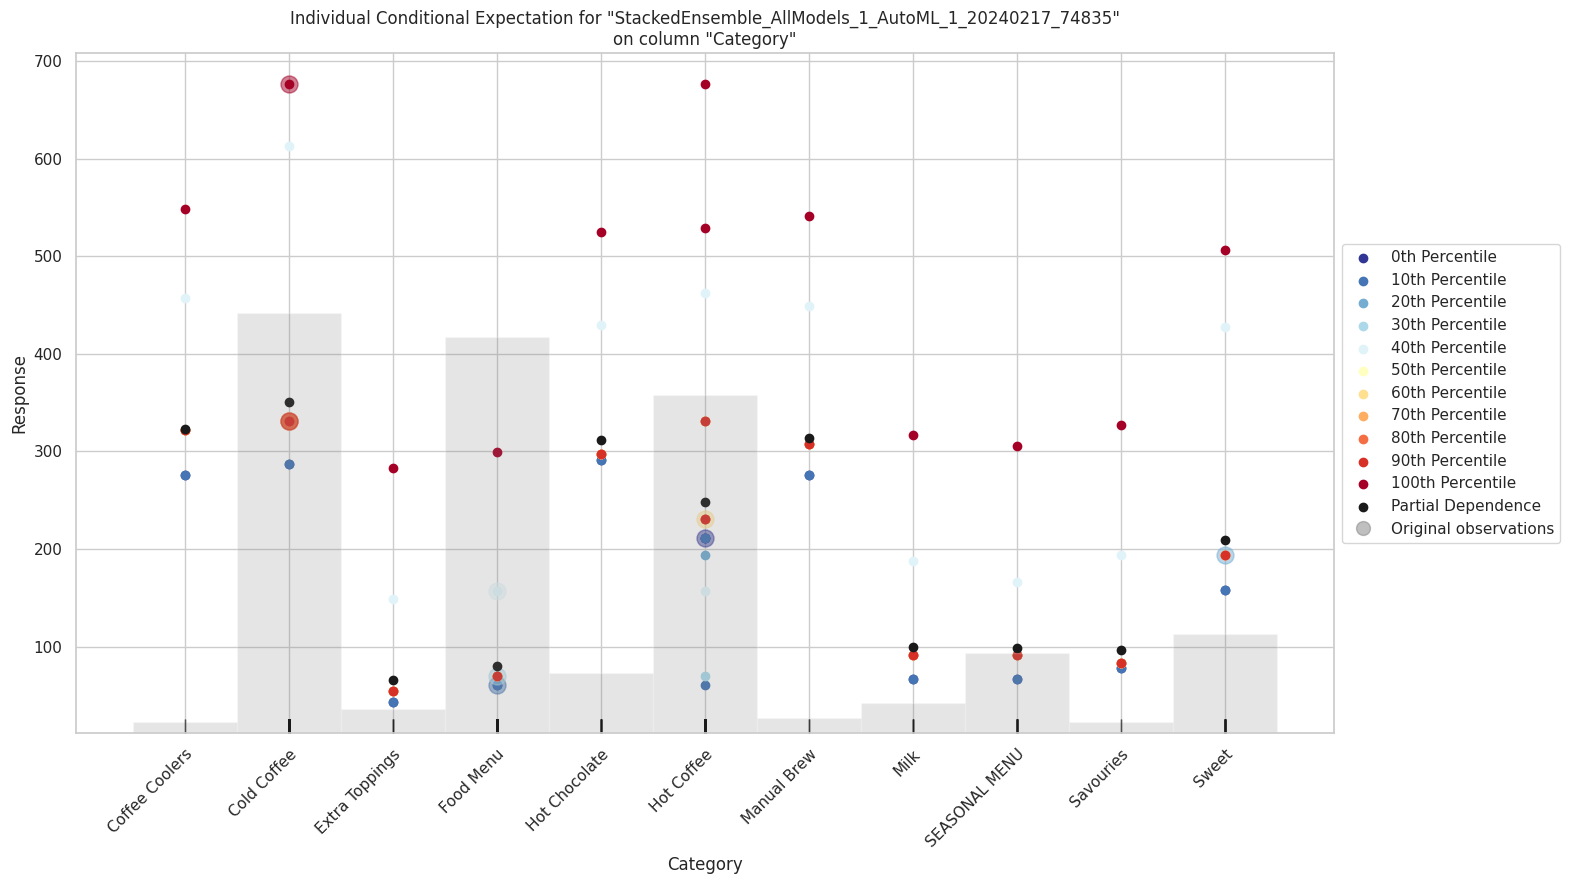

In [206]:
best_model = aml.leader
best_model.explain(h2o_df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Assuming 'sales' is your DataFrame
selected_columns = ['Payment Type', 'Order Type', 'Area', 'Qty.', 'Final Total', 'Category']
data = sales[selected_columns].copy()

# One-hot encode categorical columns
categorical_columns = ['Payment Type', 'Order Type', 'Area', 'Category']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data, encoded_columns], axis=1).drop(categorical_columns, axis=1)

# Split the data into training and testing sets
X = data.drop('Final Total', axis=1)
y = data['Final Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


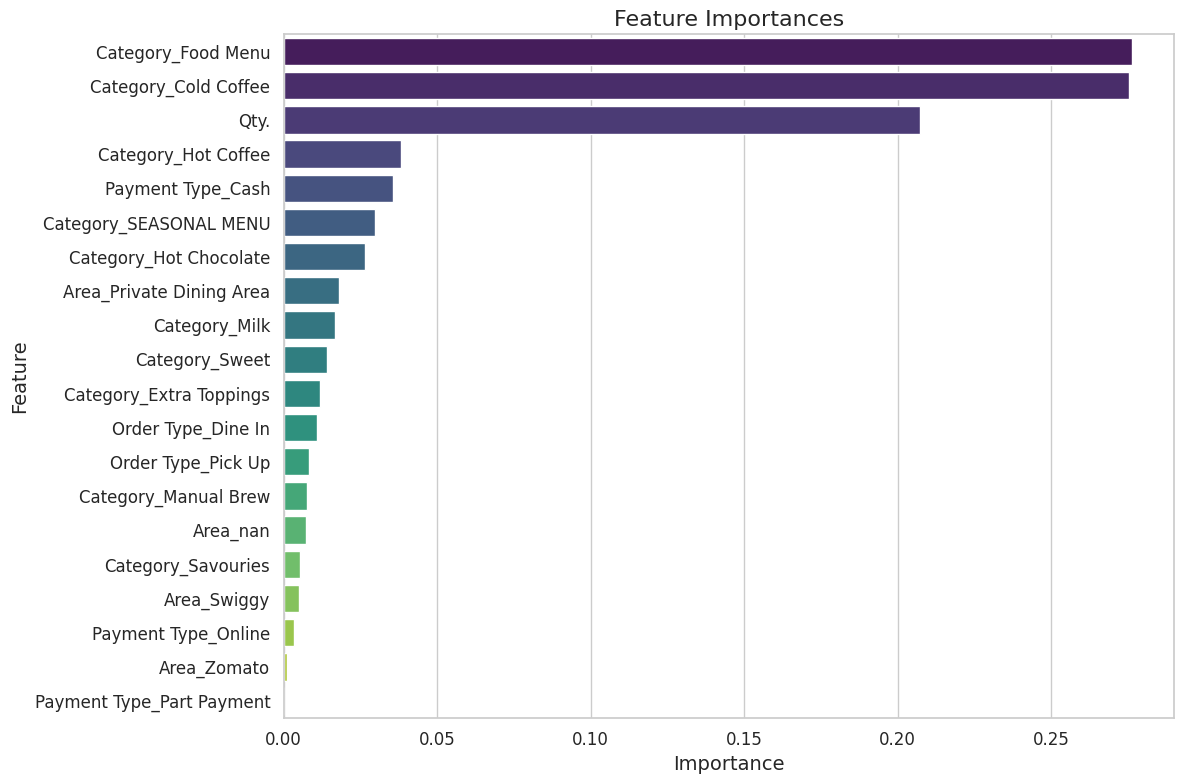

In [210]:

feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", n_colors=len(feature_importances_sorted))

ax = sns.barplot(x='Importance', y='Feature', data=feature_importances_sorted, palette=colors)

plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [211]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4827.50621506825
R-squared: 0.7572464394704651


In [ ]:
%pip install shap

In [ ]:
%pip install numpy --upgrade

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the d

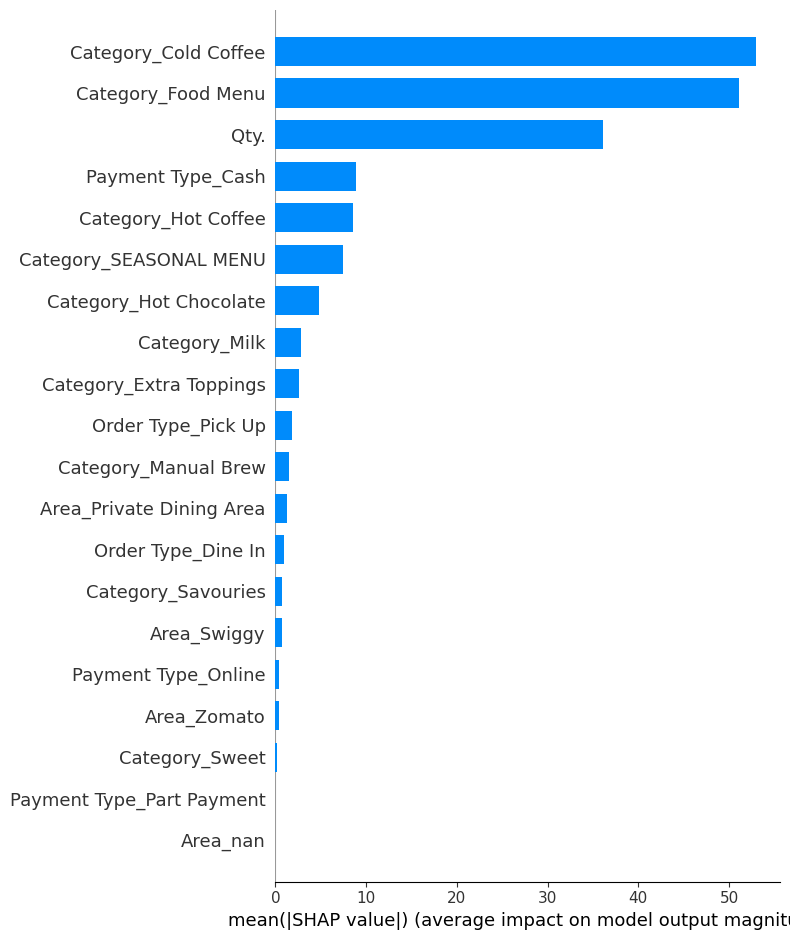

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


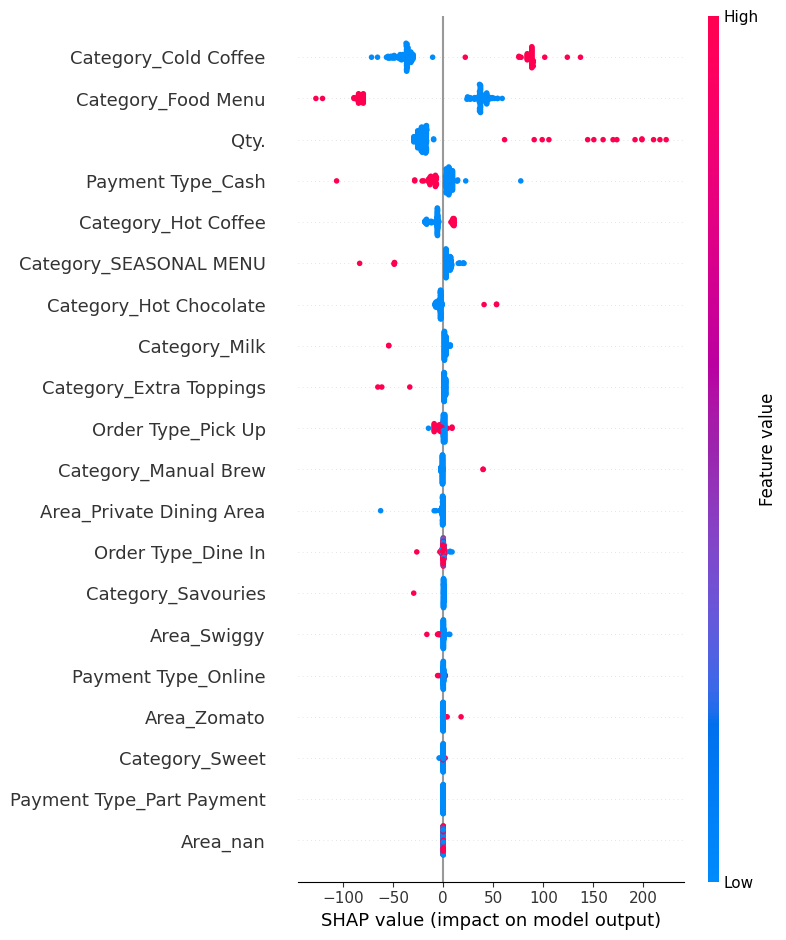

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


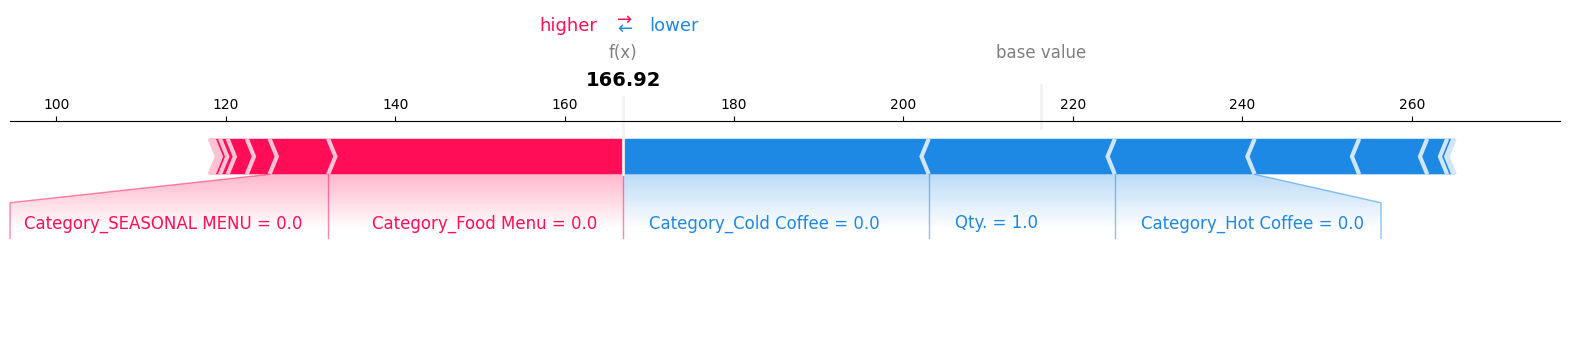

In [162]:
import xgboost as xgb

# Convert DataFrame to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

# Build an XGBoost model
xgb_model = xgb.train(params={'objective': 'reg:squarederror', 'booster': 'gbtree', 'verbosity': 0}, dtrain=dtrain)

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Visualize a summary plot of feature importances
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.show()

# Visualize a summary plot of SHAP values
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

# Visualize individual SHAP force plots
shap.initjs()  # Required for interactive plots
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True, show=False)
plt.show()


In [212]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Variation',
       'Category', 'Phone', 'Name', 'Address', 'Assign To', 'Non Taxable',
       'CGST Rate', 'CGST Amount', 'SGST Rate', 'SGST Amount', 'VAT Rate',
       'VAT Amount', 'DayOfWeek', 'HourOfDay'],
      dtype='object')